## Training the Neural Network

In [1]:
import numpy as n
import pandas as p
import glob
import matplotlib.pyplot

In [2]:
path_1="D:\\DATASET\\X & y\\Train\\"
path_2="D:\\DATASET\\X & y\\Test\\"

In [3]:
cols_1=n.concatenate([n.arange(178),n.arange(179,285),n.arange(286,332),n.arange(333,440)],axis=0)

## 1-D CNN Using Acclerometer Recordings

In [ ]:
X_train={}
X_test={}
y_train={}
y_test={}

file_list_1=glob.glob(path_1+"X_train\\"+"X_train_*.csv")
for file_path in file_list_1:
    X_train[file_path[file_path.rfind('_')+1:-4]]=p.DataFrame(p.read_csv(file_path))
    
file_list_2=glob.glob(path_1+"y_train\\"+"y_train_*.csv")
for file_path in file_list_2:
    y_train[file_path[file_path.rfind('_')+1:-4]]=p.DataFrame(p.read_csv(file_path))
    
file_list_3=glob.glob(path_2+"X_test\\"+"X_test_*.csv")
for file_path in file_list_3:
    X_test[file_path[file_path.rfind('_')+1:-4]]=p.DataFrame(p.read_csv(file_path))
    
file_list_4=glob.glob(path_2+"y_test\\"+"y_test_*.csv")
for file_path in file_list_4:
    y_test[file_path[file_path.rfind('_')+1:-4]]=p.DataFrame(p.read_csv(file_path))

In [6]:
X_Input={}
y_Input={}
X_Output={}
y_Output={}

for key in cols_1:
    X_Input[key]=n.reshape(n.asarray(X_train[str(key)]),(X_train[str(key)].shape[0],4001,2))
    y_Input[key]=n.reshape(n.asarray(y_train[str(key)]),(y_train[str(key)].shape[0],1))
    X_Output[key]=n.reshape(n.asarray(X_test[str(key)]),(X_test[str(key)].shape[0],4001,2))
    y_Output[key]=n.reshape(n.asarray(y_test[str(key)]),(y_test[str(key)].shape[0],1))

In [2]:
from keras.models import Sequential
from keras.layers import Conv1D,MaxPool1D,Dense,Flatten

model=Sequential()

model.add(Conv1D(filters=300,kernel_size=150,input_shape=(4001,2),activation='relu',padding="same"))
model.add(MaxPool1D())
model.add(Conv1D(filters=150,activation='relu',kernel_size=10))
model.add(MaxPool1D())
model.add(Conv1D(filters=100,activation='relu',kernel_size=10))
model.add(Flatten())
model.add(Dense(output_dim=1,activation='sigmoid'))
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

Using TensorFlow backend.
C:\Users\Shagun Sharma\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\Shagun Sharma\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\Shagun Sharma\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\Shagun Sharma\Anaconda3\lib\site-packages\tenso

Instructions for updating:
Colocations handled automatically by placer.


C:\Users\Shagun Sharma\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=1)`
  if sys.path[0] == '':


In [7]:
Network_1=[]

for key in cols_1:
    print('Training of CNN for Joint: '+str(key+1)+' initiated')
    model.fit(x=X_Input[key],y=y_Input[key],batch_size=20,validation_data=(X_Output[key], y_Output[key]),epochs=10)
    Network_1.append(model)
    print('Training of CNN for Joint: '+str(key+1)+' completed')
    print("\n")

Training of CNN for Joint: 1 initiated

Train on 60 samples, validate on 16 samples
Epoch 1/10
60/60 [==============================] - 4s 64ms/step - loss: 0.6932 - accuracy: 0.4333 - val_loss: 0.6931 - val_accuracy: 0.6875
Epoch 2/10
60/60 [==============================] - 1s 10ms/step - loss: 0.6931 - accuracy: 0.5000 - val_loss: 0.6933 - val_accuracy: 0.3125
Epoch 3/10
60/60 [==============================] - 1s 10ms/step - loss: 0.6931 - accuracy: 0.5333 - val_loss: 0.6936 - val_accuracy: 0.3125
Epoch 4/10
60/60 [==============================] - 1s 10ms/step - loss: 0.6931 - accuracy: 0.5333 - val_loss: 0.6938 - val_accuracy: 0.3125
Epoch 5/10
60/60 [==============================] - 1s 10ms/step - loss: 0.6930 - accuracy: 0.5333 - val_loss: 0.6940 - val_accuracy: 0.3125
Epoch 6/10
60/60 [==============================] - 1s 10ms/step - loss: 0.6930 - accuracy: 0.5333 - val_loss: 0.6942 - val_accuracy: 0.3125
Epoch 7/10
60/60 [==============================] - 1s 10ms/step - los

Epoch 6/10
60/60 [==============================] - 1s 10ms/step - loss: 0.0211 - accuracy: 0.9833 - val_loss: 0.3747 - val_accuracy: 0.8125
Epoch 7/10
60/60 [==============================] - 1s 10ms/step - loss: 0.0121 - accuracy: 1.0000 - val_loss: 0.5852 - val_accuracy: 0.8125
Epoch 8/10
60/60 [==============================] - 1s 10ms/step - loss: 0.0038 - accuracy: 1.0000 - val_loss: 1.3311 - val_accuracy: 0.7500
Epoch 9/10
60/60 [==============================] - 1s 10ms/step - loss: 0.0209 - accuracy: 0.9833 - val_loss: 0.8483 - val_accuracy: 0.7500
Epoch 10/10
60/60 [==============================] - 1s 10ms/step - loss: 0.0122 - accuracy: 1.0000 - val_loss: 0.5876 - val_accuracy: 0.8125
Training of CNN for Joint: 11 completed


Training of CNN for Joint: 12 initiated
Train on 60 samples, validate on 16 samples
Epoch 1/10
60/60 [==============================] - 1s 10ms/step - loss: 0.0109 - accuracy: 1.0000 - val_loss: 1.0461 - val_accuracy: 0.8125
Epoch 2/10
60/60 [=========

60/60 [==============================] - 1s 10ms/step - loss: 5.3232e-05 - accuracy: 1.0000 - val_loss: 1.3877 - val_accuracy: 0.7500
Training of CNN for Joint: 21 completed


Training of CNN for Joint: 22 initiated
Train on 60 samples, validate on 16 samples
Epoch 1/10
60/60 [==============================] - 1s 10ms/step - loss: 7.2113e-05 - accuracy: 1.0000 - val_loss: 1.4119 - val_accuracy: 0.7500
Epoch 2/10
60/60 [==============================] - 1s 10ms/step - loss: 5.0867e-05 - accuracy: 1.0000 - val_loss: 1.3746 - val_accuracy: 0.7500
Epoch 3/10
60/60 [==============================] - 1s 10ms/step - loss: 5.2617e-05 - accuracy: 1.0000 - val_loss: 1.3637 - val_accuracy: 0.7500
Epoch 4/10
60/60 [==============================] - 1s 10ms/step - loss: 5.3180e-05 - accuracy: 1.0000 - val_loss: 1.3792 - val_accuracy: 0.7500
Epoch 5/10
60/60 [==============================] - 1s 10ms/step - loss: 5.0366e-05 - accuracy: 1.0000 - val_loss: 1.4006 - val_accuracy: 0.7500
Epoch 6/10
60/6

Epoch 6/10
60/60 [==============================] - 1s 10ms/step - loss: 0.0027 - accuracy: 1.0000 - val_loss: 0.8842 - val_accuracy: 0.7500
Epoch 7/10
60/60 [==============================] - 1s 10ms/step - loss: 0.0024 - accuracy: 1.0000 - val_loss: 0.7375 - val_accuracy: 0.7500
Epoch 8/10
60/60 [==============================] - 1s 10ms/step - loss: 0.0019 - accuracy: 1.0000 - val_loss: 0.9978 - val_accuracy: 0.7500
Epoch 9/10
60/60 [==============================] - 1s 10ms/step - loss: 0.0018 - accuracy: 1.0000 - val_loss: 1.0647 - val_accuracy: 0.7500
Epoch 10/10
60/60 [==============================] - 1s 10ms/step - loss: 0.0016 - accuracy: 1.0000 - val_loss: 0.8161 - val_accuracy: 0.7500
Training of CNN for Joint: 32 completed


Training of CNN for Joint: 33 initiated
Train on 60 samples, validate on 16 samples
Epoch 1/10
60/60 [==============================] - 1s 10ms/step - loss: 0.0029 - accuracy: 1.0000 - val_loss: 0.9711 - val_accuracy: 0.8125
Epoch 2/10
60/60 [=========

Epoch 9/10
60/60 [==============================] - 1s 10ms/step - loss: 1.3561e-04 - accuracy: 1.0000 - val_loss: 1.5175 - val_accuracy: 0.7500
Epoch 10/10
60/60 [==============================] - 1s 10ms/step - loss: 1.3272e-04 - accuracy: 1.0000 - val_loss: 1.5358 - val_accuracy: 0.7500
Training of CNN for Joint: 37 completed


Training of CNN for Joint: 38 initiated
Train on 60 samples, validate on 16 samples
Epoch 1/10
60/60 [==============================] - 1s 10ms/step - loss: 1.6591e-04 - accuracy: 1.0000 - val_loss: 1.5560 - val_accuracy: 0.7500
Epoch 2/10
60/60 [==============================] - 1s 10ms/step - loss: 1.4487e-04 - accuracy: 1.0000 - val_loss: 1.5545 - val_accuracy: 0.7500
Epoch 3/10
60/60 [==============================] - 1s 10ms/step - loss: 1.2819e-04 - accuracy: 1.0000 - val_loss: 1.5365 - val_accuracy: 0.7500
Epoch 4/10
60/60 [==============================] - 1s 10ms/step - loss: 1.1757e-04 - accuracy: 1.0000 - val_loss: 1.5292 - val_accuracy: 0.7500
Epo

60/60 [==============================] - 1s 10ms/step - loss: 3.3050e-05 - accuracy: 1.0000 - val_loss: 2.0403 - val_accuracy: 0.7500
Epoch 2/10
60/60 [==============================] - 1s 10ms/step - loss: 2.4268e-05 - accuracy: 1.0000 - val_loss: 2.0149 - val_accuracy: 0.7500
Epoch 3/10
60/60 [==============================] - 1s 10ms/step - loss: 2.6699e-05 - accuracy: 1.0000 - val_loss: 1.9846 - val_accuracy: 0.7500
Epoch 4/10
60/60 [==============================] - 1s 10ms/step - loss: 2.7165e-05 - accuracy: 1.0000 - val_loss: 1.9913 - val_accuracy: 0.7500
Epoch 5/10
60/60 [==============================] - 1s 10ms/step - loss: 2.2913e-05 - accuracy: 1.0000 - val_loss: 1.9911 - val_accuracy: 0.7500
Epoch 6/10
60/60 [==============================] - 1s 10ms/step - loss: 2.2810e-05 - accuracy: 1.0000 - val_loss: 2.0003 - val_accuracy: 0.7500
Epoch 7/10
60/60 [==============================] - 1s 10ms/step - loss: 2.2643e-05 - accuracy: 1.0000 - val_loss: 1.9976 - val_accuracy: 0.7

Epoch 8/10
60/60 [==============================] - 1s 10ms/step - loss: 7.2055e-04 - accuracy: 1.0000 - val_loss: 1.6936 - val_accuracy: 0.8125
Epoch 9/10
60/60 [==============================] - 1s 10ms/step - loss: 7.4793e-04 - accuracy: 1.0000 - val_loss: 1.6443 - val_accuracy: 0.7500
Epoch 10/10
60/60 [==============================] - 1s 10ms/step - loss: 7.8868e-04 - accuracy: 1.0000 - val_loss: 1.5974 - val_accuracy: 0.7500
Training of CNN for Joint: 53 completed


Training of CNN for Joint: 54 initiated
Train on 60 samples, validate on 16 samples
Epoch 1/10
60/60 [==============================] - 1s 10ms/step - loss: 0.0068 - accuracy: 1.0000 - val_loss: 1.1987 - val_accuracy: 0.7500
Epoch 2/10
60/60 [==============================] - 1s 10ms/step - loss: 5.9288e-04 - accuracy: 1.0000 - val_loss: 2.5939 - val_accuracy: 0.7500
Epoch 3/10
60/60 [==============================] - 1s 10ms/step - loss: 0.0013 - accuracy: 1.0000 - val_loss: 2.8156 - val_accuracy: 0.7500
Epoch 4/10


60/60 [==============================] - 1s 10ms/step - loss: 1.5700e-05 - accuracy: 1.0000 - val_loss: 2.2146 - val_accuracy: 0.7500
Epoch 2/10
60/60 [==============================] - 1s 10ms/step - loss: 1.4948e-05 - accuracy: 1.0000 - val_loss: 2.2044 - val_accuracy: 0.7500
Epoch 3/10
60/60 [==============================] - 1s 10ms/step - loss: 1.4188e-05 - accuracy: 1.0000 - val_loss: 2.1935 - val_accuracy: 0.7500
Epoch 4/10
60/60 [==============================] - 1s 10ms/step - loss: 1.3781e-05 - accuracy: 1.0000 - val_loss: 2.1792 - val_accuracy: 0.7500
Epoch 5/10
60/60 [==============================] - 1s 10ms/step - loss: 1.3205e-05 - accuracy: 1.0000 - val_loss: 2.1677 - val_accuracy: 0.7500
Epoch 6/10
60/60 [==============================] - 1s 10ms/step - loss: 1.3011e-05 - accuracy: 1.0000 - val_loss: 2.1562 - val_accuracy: 0.7500
Epoch 7/10
60/60 [==============================] - 1s 10ms/step - loss: 1.2687e-05 - accuracy: 1.0000 - val_loss: 2.1476 - val_accuracy: 0.7

Epoch 4/10
60/60 [==============================] - 1s 10ms/step - loss: 0.2000 - accuracy: 0.9000 - val_loss: 1.7314 - val_accuracy: 0.6250
Epoch 5/10
60/60 [==============================] - 1s 10ms/step - loss: 0.2258 - accuracy: 0.9667 - val_loss: 2.6594 - val_accuracy: 0.6250
Epoch 6/10
60/60 [==============================] - 1s 10ms/step - loss: 0.1932 - accuracy: 0.9333 - val_loss: 0.9914 - val_accuracy: 0.7500
Epoch 7/10
60/60 [==============================] - 1s 10ms/step - loss: 0.3187 - accuracy: 0.9167 - val_loss: 2.9820 - val_accuracy: 0.5000
Epoch 8/10
60/60 [==============================] - 1s 10ms/step - loss: 1.2333 - accuracy: 0.9000 - val_loss: 3.6998 - val_accuracy: 0.5625
Epoch 9/10
60/60 [==============================] - 1s 10ms/step - loss: 1.1188 - accuracy: 0.8333 - val_loss: 8.2551 - val_accuracy: 0.5000
Epoch 10/10
60/60 [==============================] - 1s 10ms/step - loss: 0.8296 - accuracy: 0.8833 - val_loss: 1.7665 - val_accuracy: 0.7500
Training of 

Epoch 10/10
60/60 [==============================] - 1s 10ms/step - loss: 1.8370e-04 - accuracy: 1.0000 - val_loss: 1.3789 - val_accuracy: 0.7500
Training of CNN for Joint: 79 completed


Training of CNN for Joint: 80 initiated
Train on 60 samples, validate on 16 samples
Epoch 1/10
60/60 [==============================] - 1s 10ms/step - loss: 2.9897e-04 - accuracy: 1.0000 - val_loss: 1.7836 - val_accuracy: 0.7500
Epoch 2/10
60/60 [==============================] - 1s 10ms/step - loss: 1.9579e-04 - accuracy: 1.0000 - val_loss: 1.7392 - val_accuracy: 0.7500
Epoch 3/10
60/60 [==============================] - 1s 10ms/step - loss: 1.6329e-04 - accuracy: 1.0000 - val_loss: 1.6912 - val_accuracy: 0.7500
Epoch 4/10
60/60 [==============================] - 1s 10ms/step - loss: 1.4239e-04 - accuracy: 1.0000 - val_loss: 1.6491 - val_accuracy: 0.7500
Epoch 5/10
60/60 [==============================] - 1s 10ms/step - loss: 1.4070e-04 - accuracy: 1.0000 - val_loss: 1.6131 - val_accuracy: 0.7500
Epo

60/60 [==============================] - 1s 10ms/step - loss: 0.4470 - accuracy: 0.5333 - val_loss: 0.7712 - val_accuracy: 0.3125
Epoch 4/10
60/60 [==============================] - 1s 10ms/step - loss: 0.3983 - accuracy: 0.6500 - val_loss: 0.8303 - val_accuracy: 0.5625
Epoch 5/10
60/60 [==============================] - 1s 10ms/step - loss: 0.3571 - accuracy: 0.8500 - val_loss: 0.8594 - val_accuracy: 0.6875
Epoch 6/10
60/60 [==============================] - 1s 10ms/step - loss: 0.2878 - accuracy: 0.9333 - val_loss: 0.4582 - val_accuracy: 0.9375
Epoch 7/10
60/60 [==============================] - 1s 10ms/step - loss: 0.2941 - accuracy: 0.9333 - val_loss: 0.6972 - val_accuracy: 0.7500
Epoch 8/10
60/60 [==============================] - 1s 10ms/step - loss: 0.1405 - accuracy: 0.9500 - val_loss: 0.4167 - val_accuracy: 0.8750
Epoch 9/10
60/60 [==============================] - 1s 10ms/step - loss: 0.0994 - accuracy: 0.9667 - val_loss: 0.6941 - val_accuracy: 0.7500
Epoch 10/10
60/60 [=====

60/60 [==============================] - 1s 10ms/step - loss: 9.6534e-06 - accuracy: 1.0000 - val_loss: 1.3593 - val_accuracy: 0.8125
Epoch 9/10
60/60 [==============================] - 1s 10ms/step - loss: 7.7857e-06 - accuracy: 1.0000 - val_loss: 1.4690 - val_accuracy: 0.8750
Epoch 10/10
60/60 [==============================] - 1s 10ms/step - loss: 6.9835e-06 - accuracy: 1.0000 - val_loss: 1.5596 - val_accuracy: 0.8750
Training of CNN for Joint: 100 completed


Training of CNN for Joint: 101 initiated
Train on 60 samples, validate on 16 samples
Epoch 1/10
60/60 [==============================] - 1s 10ms/step - loss: 8.6743e-05 - accuracy: 1.0000 - val_loss: 1.6601 - val_accuracy: 0.8750
Epoch 2/10
60/60 [==============================] - 1s 10ms/step - loss: 4.0927e-05 - accuracy: 1.0000 - val_loss: 1.3924 - val_accuracy: 0.8125
Epoch 3/10
60/60 [==============================] - 1s 10ms/step - loss: 2.2344e-05 - accuracy: 1.0000 - val_loss: 1.2409 - val_accuracy: 0.8125
Epoch 4/10
6

60/60 [==============================] - 1s 10ms/step - loss: 13.1625 - accuracy: 0.4667 - val_loss: 4.9517 - val_accuracy: 0.6875
Epoch 2/10
60/60 [==============================] - 1s 10ms/step - loss: 6.1920 - accuracy: 0.4667 - val_loss: 1.3421 - val_accuracy: 0.6875
Epoch 3/10
60/60 [==============================] - 1s 10ms/step - loss: 1.1452 - accuracy: 0.5667 - val_loss: 1.5111 - val_accuracy: 0.3125
Epoch 4/10
60/60 [==============================] - 1s 10ms/step - loss: 1.1376 - accuracy: 0.5333 - val_loss: 1.5195 - val_accuracy: 0.3125
Epoch 5/10
60/60 [==============================] - 1s 10ms/step - loss: 0.9719 - accuracy: 0.5333 - val_loss: 1.1218 - val_accuracy: 0.3125
Epoch 6/10
60/60 [==============================] - 1s 10ms/step - loss: 0.8064 - accuracy: 0.5333 - val_loss: 0.8503 - val_accuracy: 0.3125
Epoch 7/10
60/60 [==============================] - 1s 10ms/step - loss: 0.7042 - accuracy: 0.5333 - val_loss: 0.7255 - val_accuracy: 0.3125
Epoch 8/10
60/60 [=====

Epoch 7/10
60/60 [==============================] - 1s 10ms/step - loss: 1.0459e-04 - accuracy: 1.0000 - val_loss: 1.1831 - val_accuracy: 0.7500
Epoch 8/10
60/60 [==============================] - 1s 10ms/step - loss: 9.8701e-05 - accuracy: 1.0000 - val_loss: 1.2120 - val_accuracy: 0.7500
Epoch 9/10
60/60 [==============================] - 1s 10ms/step - loss: 9.0461e-05 - accuracy: 1.0000 - val_loss: 1.2371 - val_accuracy: 0.7500
Epoch 10/10
60/60 [==============================] - 1s 10ms/step - loss: 8.4135e-05 - accuracy: 1.0000 - val_loss: 1.2595 - val_accuracy: 0.7500
Training of CNN for Joint: 121 completed


Training of CNN for Joint: 122 initiated
Train on 60 samples, validate on 16 samples
Epoch 1/10
60/60 [==============================] - 1s 10ms/step - loss: 1.9119e-04 - accuracy: 1.0000 - val_loss: 0.7974 - val_accuracy: 0.8750
Epoch 2/10
60/60 [==============================] - 1s 10ms/step - loss: 1.7922e-04 - accuracy: 1.0000 - val_loss: 0.8129 - val_accuracy: 0.8750
E

60/60 [==============================] - 1s 10ms/step - loss: 3.3409e-05 - accuracy: 1.0000 - val_loss: 1.2759 - val_accuracy: 0.6875
Epoch 10/10
60/60 [==============================] - 1s 10ms/step - loss: 3.1303e-05 - accuracy: 1.0000 - val_loss: 1.2630 - val_accuracy: 0.6875
Training of CNN for Joint: 126 completed


Training of CNN for Joint: 127 initiated
Train on 60 samples, validate on 16 samples
Epoch 1/10
60/60 [==============================] - 1s 10ms/step - loss: 5.5657e-05 - accuracy: 1.0000 - val_loss: 1.3399 - val_accuracy: 0.6875
Epoch 2/10
60/60 [==============================] - 1s 10ms/step - loss: 5.2555e-05 - accuracy: 1.0000 - val_loss: 1.3224 - val_accuracy: 0.6875
Epoch 3/10
60/60 [==============================] - 1s 10ms/step - loss: 4.4674e-05 - accuracy: 1.0000 - val_loss: 1.3088 - val_accuracy: 0.6875
Epoch 4/10
60/60 [==============================] - 1s 10ms/step - loss: 4.2191e-05 - accuracy: 1.0000 - val_loss: 1.2947 - val_accuracy: 0.6875
Epoch 5/10
6

60/60 [==============================] - 1s 10ms/step - loss: 1.4090e-05 - accuracy: 1.0000 - val_loss: 0.8403 - val_accuracy: 0.8125
Epoch 2/10
60/60 [==============================] - 1s 10ms/step - loss: 1.2671e-05 - accuracy: 1.0000 - val_loss: 0.8410 - val_accuracy: 0.8125
Epoch 3/10
60/60 [==============================] - 1s 10ms/step - loss: 1.1227e-05 - accuracy: 1.0000 - val_loss: 0.8424 - val_accuracy: 0.8125
Epoch 4/10
60/60 [==============================] - 1s 10ms/step - loss: 1.0825e-05 - accuracy: 1.0000 - val_loss: 0.8454 - val_accuracy: 0.8125
Epoch 5/10
60/60 [==============================] - 1s 10ms/step - loss: 1.0269e-05 - accuracy: 1.0000 - val_loss: 0.8479 - val_accuracy: 0.8125
Epoch 6/10
60/60 [==============================] - 1s 10ms/step - loss: 9.7481e-06 - accuracy: 1.0000 - val_loss: 0.8466 - val_accuracy: 0.8125
Epoch 7/10
60/60 [==============================] - 1s 10ms/step - loss: 9.8240e-06 - accuracy: 1.0000 - val_loss: 0.8469 - val_accuracy: 0.8

60/60 [==============================] - 1s 10ms/step - loss: 1.9688e-04 - accuracy: 1.0000 - val_loss: 2.0891 - val_accuracy: 0.7500
Epoch 8/10
60/60 [==============================] - 1s 10ms/step - loss: 1.4653e-04 - accuracy: 1.0000 - val_loss: 2.0771 - val_accuracy: 0.7500
Epoch 9/10
60/60 [==============================] - 1s 10ms/step - loss: 1.3683e-04 - accuracy: 1.0000 - val_loss: 2.0234 - val_accuracy: 0.7500
Epoch 10/10
60/60 [==============================] - 1s 10ms/step - loss: 1.3427e-04 - accuracy: 1.0000 - val_loss: 1.9802 - val_accuracy: 0.7500
Training of CNN for Joint: 142 completed


Training of CNN for Joint: 143 initiated
Train on 60 samples, validate on 16 samples
Epoch 1/10
60/60 [==============================] - 1s 10ms/step - loss: 6.5494e-04 - accuracy: 1.0000 - val_loss: 1.0838 - val_accuracy: 0.8125
Epoch 2/10
60/60 [==============================] - 1s 10ms/step - loss: 4.1755e-04 - accuracy: 1.0000 - val_loss: 1.0801 - val_accuracy: 0.8750
Epoch 3/10
6

60/60 [==============================] - 1s 10ms/step - loss: 7.9846e-06 - accuracy: 1.0000 - val_loss: 4.8482 - val_accuracy: 0.6250
Epoch 2/10
60/60 [==============================] - 1s 10ms/step - loss: 7.5673e-06 - accuracy: 1.0000 - val_loss: 4.6895 - val_accuracy: 0.6250
Epoch 3/10
60/60 [==============================] - 1s 10ms/step - loss: 6.8329e-06 - accuracy: 1.0000 - val_loss: 4.5888 - val_accuracy: 0.6250
Epoch 4/10
60/60 [==============================] - 1s 10ms/step - loss: 6.6693e-06 - accuracy: 1.0000 - val_loss: 4.5120 - val_accuracy: 0.6250
Epoch 5/10
60/60 [==============================] - 1s 10ms/step - loss: 6.1245e-06 - accuracy: 1.0000 - val_loss: 4.5222 - val_accuracy: 0.6250
Epoch 6/10
60/60 [==============================] - 1s 10ms/step - loss: 5.6720e-06 - accuracy: 1.0000 - val_loss: 4.5787 - val_accuracy: 0.6250
Epoch 7/10
60/60 [==============================] - 1s 10ms/step - loss: 5.1186e-06 - accuracy: 1.0000 - val_loss: 4.6512 - val_accuracy: 0.6

60/60 [==============================] - 1s 10ms/step - loss: 0.1425 - accuracy: 0.9833 - val_loss: 0.4897 - val_accuracy: 0.8750
Epoch 5/10
60/60 [==============================] - 1s 10ms/step - loss: 0.0013 - accuracy: 1.0000 - val_loss: 0.8034 - val_accuracy: 0.8750
Epoch 6/10
60/60 [==============================] - 1s 10ms/step - loss: 0.0032 - accuracy: 1.0000 - val_loss: 0.9922 - val_accuracy: 0.8750
Epoch 7/10
60/60 [==============================] - 1s 10ms/step - loss: 0.0042 - accuracy: 1.0000 - val_loss: 1.0751 - val_accuracy: 0.8750
Epoch 8/10
60/60 [==============================] - 1s 10ms/step - loss: 0.0041 - accuracy: 1.0000 - val_loss: 1.0813 - val_accuracy: 0.8750
Epoch 9/10
60/60 [==============================] - 1s 10ms/step - loss: 0.0052 - accuracy: 1.0000 - val_loss: 1.0724 - val_accuracy: 0.8750
Epoch 10/10
60/60 [==============================] - 1s 10ms/step - loss: 0.0042 - accuracy: 1.0000 - val_loss: 1.0684 - val_accuracy: 0.8750
Training of CNN for Joi

Epoch 7/10
60/60 [==============================] - 1s 10ms/step - loss: 1.4367e-04 - accuracy: 1.0000 - val_loss: 3.3516 - val_accuracy: 0.6250
Epoch 8/10
60/60 [==============================] - 1s 10ms/step - loss: 1.3066e-04 - accuracy: 1.0000 - val_loss: 3.3389 - val_accuracy: 0.6250
Epoch 9/10
60/60 [==============================] - 1s 10ms/step - loss: 1.2430e-04 - accuracy: 1.0000 - val_loss: 3.3349 - val_accuracy: 0.6250
Epoch 10/10
60/60 [==============================] - 1s 10ms/step - loss: 1.1597e-04 - accuracy: 1.0000 - val_loss: 3.3331 - val_accuracy: 0.6250
Training of CNN for Joint: 163 completed


Training of CNN for Joint: 164 initiated
Train on 60 samples, validate on 16 samples
Epoch 1/10
60/60 [==============================] - 1s 10ms/step - loss: 2.1890e-04 - accuracy: 1.0000 - val_loss: 2.6843 - val_accuracy: 0.8125
Epoch 2/10
60/60 [==============================] - 1s 10ms/step - loss: 1.9179e-04 - accuracy: 1.0000 - val_loss: 2.6952 - val_accuracy: 0.8125
E

60/60 [==============================] - 1s 10ms/step - loss: 2.6991e-05 - accuracy: 1.0000 - val_loss: 1.1748 - val_accuracy: 0.8125
Epoch 10/10
60/60 [==============================] - 1s 10ms/step - loss: 2.6289e-05 - accuracy: 1.0000 - val_loss: 1.1710 - val_accuracy: 0.8125
Training of CNN for Joint: 168 completed


Training of CNN for Joint: 169 initiated
Train on 60 samples, validate on 16 samples
Epoch 1/10
60/60 [==============================] - 1s 10ms/step - loss: 3.3876e-05 - accuracy: 1.0000 - val_loss: 1.4447 - val_accuracy: 0.8125
Epoch 2/10
60/60 [==============================] - 1s 10ms/step - loss: 3.2432e-05 - accuracy: 1.0000 - val_loss: 1.4388 - val_accuracy: 0.8125
Epoch 3/10
60/60 [==============================] - 1s 10ms/step - loss: 2.9020e-05 - accuracy: 1.0000 - val_loss: 1.4328 - val_accuracy: 0.8125
Epoch 4/10
60/60 [==============================] - 1s 10ms/step - loss: 2.5391e-05 - accuracy: 1.0000 - val_loss: 1.4271 - val_accuracy: 0.8125
Epoch 5/10
6

60/60 [==============================] - 1s 10ms/step - loss: 2.3053e-05 - accuracy: 1.0000 - val_loss: 1.2211 - val_accuracy: 0.8125
Epoch 2/10
60/60 [==============================] - 1s 10ms/step - loss: 2.1511e-05 - accuracy: 1.0000 - val_loss: 1.2190 - val_accuracy: 0.8125
Epoch 3/10
60/60 [==============================] - 1s 10ms/step - loss: 2.0448e-05 - accuracy: 1.0000 - val_loss: 1.2156 - val_accuracy: 0.8125
Epoch 4/10
60/60 [==============================] - 1s 10ms/step - loss: 1.9307e-05 - accuracy: 1.0000 - val_loss: 1.2113 - val_accuracy: 0.8125
Epoch 5/10
60/60 [==============================] - 1s 10ms/step - loss: 1.7357e-05 - accuracy: 1.0000 - val_loss: 1.2083 - val_accuracy: 0.8125
Epoch 6/10
60/60 [==============================] - 1s 10ms/step - loss: 1.6452e-05 - accuracy: 1.0000 - val_loss: 1.2053 - val_accuracy: 0.8125
Epoch 7/10
60/60 [==============================] - 1s 10ms/step - loss: 1.5789e-05 - accuracy: 1.0000 - val_loss: 1.2025 - val_accuracy: 0.8

Epoch 4/10
60/60 [==============================] - 1s 10ms/step - loss: 0.8455 - accuracy: 0.8333 - val_loss: 9.5877 - val_accuracy: 0.6250
Epoch 5/10
60/60 [==============================] - 1s 10ms/step - loss: 0.1903 - accuracy: 0.9667 - val_loss: 2.3846 - val_accuracy: 0.6875
Epoch 6/10
60/60 [==============================] - 1s 10ms/step - loss: 0.4799 - accuracy: 0.9500 - val_loss: 1.8037 - val_accuracy: 0.6875
Epoch 7/10
60/60 [==============================] - 1s 10ms/step - loss: 0.0631 - accuracy: 0.9833 - val_loss: 3.8794 - val_accuracy: 0.6250
Epoch 8/10
60/60 [==============================] - 1s 10ms/step - loss: 0.0743 - accuracy: 0.9833 - val_loss: 4.5514 - val_accuracy: 0.5625
Epoch 9/10
60/60 [==============================] - 1s 10ms/step - loss: 0.1286 - accuracy: 0.9667 - val_loss: 4.0877 - val_accuracy: 0.5625
Epoch 10/10
60/60 [==============================] - 1s 10ms/step - loss: 0.0763 - accuracy: 0.9833 - val_loss: 2.9799 - val_accuracy: 0.5625
Training of 

Epoch 7/10
60/60 [==============================] - 1s 10ms/step - loss: 3.8919e-05 - accuracy: 1.0000 - val_loss: 10.0706 - val_accuracy: 0.6875
Epoch 8/10
60/60 [==============================] - 1s 10ms/step - loss: 3.2216e-05 - accuracy: 1.0000 - val_loss: 9.9988 - val_accuracy: 0.6875
Epoch 9/10
60/60 [==============================] - 1s 10ms/step - loss: 2.7100e-05 - accuracy: 1.0000 - val_loss: 9.9460 - val_accuracy: 0.6875
Epoch 10/10
60/60 [==============================] - 1s 10ms/step - loss: 2.5446e-05 - accuracy: 1.0000 - val_loss: 9.9100 - val_accuracy: 0.6875
Training of CNN for Joint: 185 completed


Training of CNN for Joint: 186 initiated
Train on 60 samples, validate on 16 samples
Epoch 1/10
60/60 [==============================] - 1s 10ms/step - loss: 0.0025 - accuracy: 1.0000 - val_loss: 11.3847 - val_accuracy: 0.6250
Epoch 2/10
60/60 [==============================] - 1s 10ms/step - loss: 2.1648e-04 - accuracy: 1.0000 - val_loss: 8.2264 - val_accuracy: 0.6875
Epo

Epoch 10/10
60/60 [==============================] - 1s 10ms/step - loss: 4.8186e-05 - accuracy: 1.0000 - val_loss: 2.6676 - val_accuracy: 0.7500
Training of CNN for Joint: 190 completed


Training of CNN for Joint: 191 initiated
Train on 60 samples, validate on 16 samples
Epoch 1/10
60/60 [==============================] - 1s 10ms/step - loss: 3.0868e-04 - accuracy: 1.0000 - val_loss: 2.8781 - val_accuracy: 0.6875
Epoch 2/10
60/60 [==============================] - 1s 10ms/step - loss: 2.0541e-04 - accuracy: 1.0000 - val_loss: 2.8893 - val_accuracy: 0.6875
Epoch 3/10
60/60 [==============================] - 1s 10ms/step - loss: 2.2888e-04 - accuracy: 1.0000 - val_loss: 2.8576 - val_accuracy: 0.6875
Epoch 4/10
60/60 [==============================] - 1s 10ms/step - loss: 8.4673e-05 - accuracy: 1.0000 - val_loss: 2.8125 - val_accuracy: 0.7500
Epoch 5/10
60/60 [==============================] - 1s 10ms/step - loss: 5.4961e-05 - accuracy: 1.0000 - val_loss: 2.7698 - val_accuracy: 0.7500
E

Epoch 4/10
60/60 [==============================] - 1s 10ms/step - loss: 1.1315 - accuracy: 0.8167 - val_loss: 7.1902 - val_accuracy: 0.6250
Epoch 5/10
60/60 [==============================] - 1s 10ms/step - loss: 0.1104 - accuracy: 0.9167 - val_loss: 4.0347 - val_accuracy: 0.6875
Epoch 6/10
60/60 [==============================] - 1s 10ms/step - loss: 0.4807 - accuracy: 0.9667 - val_loss: 4.7347 - val_accuracy: 0.6875
Epoch 7/10
60/60 [==============================] - 1s 10ms/step - loss: 0.0360 - accuracy: 0.9833 - val_loss: 6.3220 - val_accuracy: 0.6875
Epoch 8/10
60/60 [==============================] - 1s 10ms/step - loss: 0.1473 - accuracy: 0.9667 - val_loss: 4.4852 - val_accuracy: 0.7500
Epoch 9/10
60/60 [==============================] - 1s 10ms/step - loss: 0.0011 - accuracy: 1.0000 - val_loss: 3.2320 - val_accuracy: 0.8125
Epoch 10/10
60/60 [==============================] - 1s 10ms/step - loss: 7.5312e-04 - accuracy: 1.0000 - val_loss: 2.7433 - val_accuracy: 0.6875
Training

Epoch 10/10
60/60 [==============================] - 1s 10ms/step - loss: 8.1503e-05 - accuracy: 1.0000 - val_loss: 1.8203 - val_accuracy: 0.7500
Training of CNN for Joint: 211 completed


Training of CNN for Joint: 212 initiated
Train on 60 samples, validate on 16 samples
Epoch 1/10
60/60 [==============================] - 1s 10ms/step - loss: 3.0589e-04 - accuracy: 1.0000 - val_loss: 2.4866 - val_accuracy: 0.6875
Epoch 2/10
60/60 [==============================] - 1s 10ms/step - loss: 3.5296e-04 - accuracy: 1.0000 - val_loss: 2.5995 - val_accuracy: 0.6875
Epoch 3/10
60/60 [==============================] - 1s 10ms/step - loss: 3.1796e-04 - accuracy: 1.0000 - val_loss: 2.6788 - val_accuracy: 0.6875
Epoch 4/10
60/60 [==============================] - 1s 10ms/step - loss: 2.0957e-04 - accuracy: 1.0000 - val_loss: 2.7410 - val_accuracy: 0.6875
Epoch 5/10
60/60 [==============================] - 1s 10ms/step - loss: 1.6285e-04 - accuracy: 1.0000 - val_loss: 2.7920 - val_accuracy: 0.6875
E

60/60 [==============================] - 1s 10ms/step - loss: 0.4743 - accuracy: 0.6333 - val_loss: 0.8494 - val_accuracy: 0.6250
Epoch 4/10
60/60 [==============================] - 1s 10ms/step - loss: 0.4192 - accuracy: 0.6833 - val_loss: 0.8288 - val_accuracy: 0.6250
Epoch 5/10
60/60 [==============================] - 1s 10ms/step - loss: 0.3422 - accuracy: 0.8333 - val_loss: 0.8441 - val_accuracy: 0.7500
Epoch 6/10
60/60 [==============================] - 1s 10ms/step - loss: 0.2690 - accuracy: 0.9667 - val_loss: 0.8884 - val_accuracy: 0.7500
Epoch 7/10
60/60 [==============================] - 1s 10ms/step - loss: 0.2141 - accuracy: 0.9833 - val_loss: 0.9834 - val_accuracy: 0.7500
Epoch 8/10
60/60 [==============================] - 1s 10ms/step - loss: 0.1810 - accuracy: 0.9833 - val_loss: 0.9806 - val_accuracy: 0.7500
Epoch 9/10
60/60 [==============================] - 1s 10ms/step - loss: 0.1519 - accuracy: 0.9833 - val_loss: 1.0218 - val_accuracy: 0.6875
Epoch 10/10
60/60 [=====

60/60 [==============================] - 1s 10ms/step - loss: 2.1731e-05 - accuracy: 1.0000 - val_loss: 2.2018 - val_accuracy: 0.8125
Epoch 9/10
60/60 [==============================] - 1s 10ms/step - loss: 1.8497e-05 - accuracy: 1.0000 - val_loss: 2.1833 - val_accuracy: 0.8125
Epoch 10/10
60/60 [==============================] - 1s 10ms/step - loss: 1.6902e-05 - accuracy: 1.0000 - val_loss: 2.1654 - val_accuracy: 0.8125
Training of CNN for Joint: 232 completed


Training of CNN for Joint: 233 initiated
Train on 60 samples, validate on 16 samples
Epoch 1/10
60/60 [==============================] - 1s 10ms/step - loss: 3.7526e-05 - accuracy: 1.0000 - val_loss: 1.7662 - val_accuracy: 0.8125
Epoch 2/10
60/60 [==============================] - 1s 10ms/step - loss: 1.3659e-05 - accuracy: 1.0000 - val_loss: 1.7525 - val_accuracy: 0.8125
Epoch 3/10
60/60 [==============================] - 1s 10ms/step - loss: 1.1529e-05 - accuracy: 1.0000 - val_loss: 1.7371 - val_accuracy: 0.8125
Epoch 4/10
6

60/60 [==============================] - 1s 10ms/step - loss: 2.3739 - accuracy: 0.4667 - val_loss: 5.9637 - val_accuracy: 0.3125
Epoch 3/10
60/60 [==============================] - 1s 10ms/step - loss: 4.2364 - accuracy: 0.5333 - val_loss: 5.5150 - val_accuracy: 0.3125
Epoch 4/10
60/60 [==============================] - 1s 10ms/step - loss: 3.0641 - accuracy: 0.5333 - val_loss: 2.0659 - val_accuracy: 0.3125
Epoch 5/10
60/60 [==============================] - 1s 10ms/step - loss: 0.9808 - accuracy: 0.5333 - val_loss: 0.6396 - val_accuracy: 0.6875
Epoch 6/10
60/60 [==============================] - 1s 10ms/step - loss: 0.8901 - accuracy: 0.4667 - val_loss: 0.7068 - val_accuracy: 0.6875
Epoch 7/10
60/60 [==============================] - 1s 10ms/step - loss: 1.1474 - accuracy: 0.4667 - val_loss: 0.7190 - val_accuracy: 0.6875
Epoch 8/10
60/60 [==============================] - 1s 10ms/step - loss: 1.0601 - accuracy: 0.4667 - val_loss: 0.6482 - val_accuracy: 0.6875
Epoch 9/10
60/60 [======

Epoch 8/10
60/60 [==============================] - 1s 10ms/step - loss: 1.0070e-04 - accuracy: 1.0000 - val_loss: 2.4220 - val_accuracy: 0.7500
Epoch 9/10
60/60 [==============================] - 1s 10ms/step - loss: 9.5694e-05 - accuracy: 1.0000 - val_loss: 2.4395 - val_accuracy: 0.7500
Epoch 10/10
60/60 [==============================] - 1s 10ms/step - loss: 8.9204e-05 - accuracy: 1.0000 - val_loss: 2.4469 - val_accuracy: 0.7500
Training of CNN for Joint: 253 completed


Training of CNN for Joint: 254 initiated
Train on 60 samples, validate on 16 samples
Epoch 1/10
60/60 [==============================] - 1s 10ms/step - loss: 5.4564e-04 - accuracy: 1.0000 - val_loss: 2.2901 - val_accuracy: 0.7500
Epoch 2/10
60/60 [==============================] - 1s 10ms/step - loss: 1.3135e-04 - accuracy: 1.0000 - val_loss: 2.0769 - val_accuracy: 0.7500
Epoch 3/10
60/60 [==============================] - 1s 10ms/step - loss: 1.5261e-04 - accuracy: 1.0000 - val_loss: 1.9014 - val_accuracy: 0.7500
E

60/60 [==============================] - 1s 10ms/step - loss: 1.1192e-04 - accuracy: 1.0000 - val_loss: 3.3302 - val_accuracy: 0.7500
Training of CNN for Joint: 258 completed


Training of CNN for Joint: 259 initiated
Train on 60 samples, validate on 16 samples
Epoch 1/10
60/60 [==============================] - 1s 10ms/step - loss: 1.8930e-04 - accuracy: 1.0000 - val_loss: 3.2708 - val_accuracy: 0.7500
Epoch 2/10
60/60 [==============================] - 1s 10ms/step - loss: 1.6417e-04 - accuracy: 1.0000 - val_loss: 3.2049 - val_accuracy: 0.7500
Epoch 3/10
60/60 [==============================] - 1s 10ms/step - loss: 1.4797e-04 - accuracy: 1.0000 - val_loss: 3.1543 - val_accuracy: 0.7500
Epoch 4/10
60/60 [==============================] - 1s 10ms/step - loss: 1.5069e-04 - accuracy: 1.0000 - val_loss: 3.1354 - val_accuracy: 0.7500
Epoch 5/10
60/60 [==============================] - 1s 10ms/step - loss: 1.3738e-04 - accuracy: 1.0000 - val_loss: 3.1706 - val_accuracy: 0.7500
Epoch 6/10
60

60/60 [==============================] - 1s 10ms/step - loss: 0.0207 - accuracy: 0.9833 - val_loss: 7.4914 - val_accuracy: 0.6875
Epoch 6/10
60/60 [==============================] - 1s 10ms/step - loss: 0.0201 - accuracy: 0.9833 - val_loss: 7.2840 - val_accuracy: 0.6875
Epoch 7/10
60/60 [==============================] - 1s 10ms/step - loss: 0.0196 - accuracy: 0.9833 - val_loss: 7.1331 - val_accuracy: 0.6875
Epoch 8/10
60/60 [==============================] - 1s 10ms/step - loss: 0.0194 - accuracy: 0.9833 - val_loss: 7.0273 - val_accuracy: 0.6875
Epoch 9/10
60/60 [==============================] - 1s 10ms/step - loss: 0.0193 - accuracy: 0.9833 - val_loss: 6.9588 - val_accuracy: 0.6875
Epoch 10/10
60/60 [==============================] - 1s 10ms/step - loss: 0.0188 - accuracy: 0.9833 - val_loss: 6.9090 - val_accuracy: 0.6875
Training of CNN for Joint: 269 completed


Training of CNN for Joint: 270 initiated
Train on 60 samples, validate on 16 samples
Epoch 1/10
60/60 [==================

60/60 [==============================] - 1s 10ms/step - loss: 0.0314 - accuracy: 0.9833 - val_loss: 2.5524 - val_accuracy: 0.7500
Training of CNN for Joint: 279 completed


Training of CNN for Joint: 280 initiated
Train on 60 samples, validate on 16 samples
Epoch 1/10
60/60 [==============================] - 1s 10ms/step - loss: 0.0312 - accuracy: 0.9833 - val_loss: 2.8955 - val_accuracy: 0.7500
Epoch 2/10
60/60 [==============================] - 1s 10ms/step - loss: 0.0217 - accuracy: 0.9833 - val_loss: 2.9647 - val_accuracy: 0.7500
Epoch 3/10
60/60 [==============================] - 1s 10ms/step - loss: 0.3139 - accuracy: 0.9333 - val_loss: 2.4232 - val_accuracy: 0.8125
Epoch 4/10
60/60 [==============================] - 1s 10ms/step - loss: 0.0181 - accuracy: 0.9833 - val_loss: 2.1123 - val_accuracy: 0.7500
Epoch 5/10
60/60 [==============================] - 1s 10ms/step - loss: 0.0185 - accuracy: 0.9833 - val_loss: 1.9857 - val_accuracy: 0.7500
Epoch 6/10
60/60 [===================

Epoch 2/10
60/60 [==============================] - 1s 10ms/step - loss: 4.2468e-05 - accuracy: 1.0000 - val_loss: 2.2372 - val_accuracy: 0.6875
Epoch 3/10
60/60 [==============================] - 1s 10ms/step - loss: 3.1363e-05 - accuracy: 1.0000 - val_loss: 2.2177 - val_accuracy: 0.6875
Epoch 4/10
60/60 [==============================] - 1s 10ms/step - loss: 2.8517e-05 - accuracy: 1.0000 - val_loss: 2.1973 - val_accuracy: 0.6875
Epoch 5/10
60/60 [==============================] - 1s 10ms/step - loss: 2.3115e-05 - accuracy: 1.0000 - val_loss: 2.1821 - val_accuracy: 0.6875
Epoch 6/10
60/60 [==============================] - 1s 10ms/step - loss: 2.1571e-05 - accuracy: 1.0000 - val_loss: 2.1693 - val_accuracy: 0.6875
Epoch 7/10
60/60 [==============================] - 1s 10ms/step - loss: 1.8677e-05 - accuracy: 1.0000 - val_loss: 2.1551 - val_accuracy: 0.6875
Epoch 8/10
60/60 [==============================] - 1s 10ms/step - loss: 1.7752e-05 - accuracy: 1.0000 - val_loss: 2.1399 - val_ac

60/60 [==============================] - 1s 10ms/step - loss: 4.1582e-04 - accuracy: 1.0000 - val_loss: 3.3401 - val_accuracy: 0.7500
Epoch 9/10
60/60 [==============================] - 1s 10ms/step - loss: 3.1460e-04 - accuracy: 1.0000 - val_loss: 3.3653 - val_accuracy: 0.7500
Epoch 10/10
60/60 [==============================] - 1s 10ms/step - loss: 2.7218e-04 - accuracy: 1.0000 - val_loss: 3.3754 - val_accuracy: 0.7500
Training of CNN for Joint: 296 completed


Training of CNN for Joint: 297 initiated
Train on 60 samples, validate on 16 samples
Epoch 1/10
60/60 [==============================] - 1s 10ms/step - loss: 0.0025 - accuracy: 1.0000 - val_loss: 2.1879 - val_accuracy: 0.7500
Epoch 2/10
60/60 [==============================] - 1s 10ms/step - loss: 0.0010 - accuracy: 1.0000 - val_loss: 2.1142 - val_accuracy: 0.7500
Epoch 3/10
60/60 [==============================] - 1s 10ms/step - loss: 3.3183e-04 - accuracy: 1.0000 - val_loss: 2.0498 - val_accuracy: 0.7500
Epoch 4/10
60/60 [==

60/60 [==============================] - 1s 10ms/step - loss: 1.3034e-05 - accuracy: 1.0000 - val_loss: 1.3872 - val_accuracy: 0.8750
Epoch 2/10
60/60 [==============================] - 1s 10ms/step - loss: 9.9989e-06 - accuracy: 1.0000 - val_loss: 1.3800 - val_accuracy: 0.8750
Epoch 3/10
60/60 [==============================] - 1s 10ms/step - loss: 6.7678e-06 - accuracy: 1.0000 - val_loss: 1.3730 - val_accuracy: 0.8750
Epoch 4/10
60/60 [==============================] - 1s 10ms/step - loss: 4.6825e-06 - accuracy: 1.0000 - val_loss: 1.3656 - val_accuracy: 0.8750
Epoch 5/10
60/60 [==============================] - 1s 10ms/step - loss: 4.2120e-06 - accuracy: 1.0000 - val_loss: 1.3591 - val_accuracy: 0.8750
Epoch 6/10
60/60 [==============================] - 1s 10ms/step - loss: 3.8985e-06 - accuracy: 1.0000 - val_loss: 1.3526 - val_accuracy: 0.8750
Epoch 7/10
60/60 [==============================] - 1s 10ms/step - loss: 3.5390e-06 - accuracy: 1.0000 - val_loss: 1.3488 - val_accuracy: 0.8

60/60 [==============================] - 1s 10ms/step - loss: 1.8170 - accuracy: 0.8500 - val_loss: 33.3476 - val_accuracy: 0.6250
Epoch 5/10
60/60 [==============================] - 1s 10ms/step - loss: 0.2799 - accuracy: 0.9000 - val_loss: 28.2370 - val_accuracy: 0.6250
Epoch 6/10
60/60 [==============================] - 1s 10ms/step - loss: 0.0248 - accuracy: 0.9833 - val_loss: 24.0015 - val_accuracy: 0.6250
Epoch 7/10
60/60 [==============================] - 1s 10ms/step - loss: 0.0019 - accuracy: 1.0000 - val_loss: 23.3715 - val_accuracy: 0.6250
Epoch 8/10
60/60 [==============================] - 1s 10ms/step - loss: 0.1203 - accuracy: 0.9833 - val_loss: 22.2084 - val_accuracy: 0.6250
Epoch 9/10
60/60 [==============================] - 1s 10ms/step - loss: 6.8441e-04 - accuracy: 1.0000 - val_loss: 20.1995 - val_accuracy: 0.6250
Epoch 10/10
60/60 [==============================] - 1s 10ms/step - loss: 0.1252 - accuracy: 0.9667 - val_loss: 17.5132 - val_accuracy: 0.6250
Training of 

60/60 [==============================] - 1s 10ms/step - loss: 3.8973e-07 - accuracy: 1.0000 - val_loss: 4.0189 - val_accuracy: 0.8125
Epoch 9/10
60/60 [==============================] - 1s 10ms/step - loss: 3.1199e-07 - accuracy: 1.0000 - val_loss: 3.9882 - val_accuracy: 0.8125
Epoch 10/10
60/60 [==============================] - 1s 10ms/step - loss: 2.7068e-07 - accuracy: 1.0000 - val_loss: 3.9618 - val_accuracy: 0.8125
Training of CNN for Joint: 322 completed


Training of CNN for Joint: 323 initiated
Train on 60 samples, validate on 16 samples
Epoch 1/10
60/60 [==============================] - 1s 10ms/step - loss: 3.2734e-06 - accuracy: 1.0000 - val_loss: 5.9350 - val_accuracy: 0.7500
Epoch 2/10
60/60 [==============================] - 1s 10ms/step - loss: 1.8033e-06 - accuracy: 1.0000 - val_loss: 5.8481 - val_accuracy: 0.7500
Epoch 3/10
60/60 [==============================] - 1s 10ms/step - loss: 8.7056e-07 - accuracy: 1.0000 - val_loss: 5.7556 - val_accuracy: 0.7500
Epoch 4/10
6

Epoch 2/10
60/60 [==============================] - 1s 10ms/step - loss: 0.5644 - accuracy: 0.9000 - val_loss: 9.1951 - val_accuracy: 0.6250
Epoch 3/10
60/60 [==============================] - 1s 10ms/step - loss: 0.1271 - accuracy: 0.9500 - val_loss: 7.6448 - val_accuracy: 0.6250
Epoch 4/10
60/60 [==============================] - 1s 10ms/step - loss: 0.0891 - accuracy: 0.9833 - val_loss: 6.8181 - val_accuracy: 0.6250
Epoch 5/10
60/60 [==============================] - 1s 10ms/step - loss: 0.0547 - accuracy: 0.9833 - val_loss: 5.6282 - val_accuracy: 0.6875
Epoch 6/10
60/60 [==============================] - 1s 10ms/step - loss: 0.0954 - accuracy: 0.9667 - val_loss: 6.1121 - val_accuracy: 0.6875
Epoch 7/10
60/60 [==============================] - 1s 10ms/step - loss: 0.0335 - accuracy: 1.0000 - val_loss: 7.0131 - val_accuracy: 0.6875
Epoch 8/10
60/60 [==============================] - 1s 10ms/step - loss: 0.0703 - accuracy: 0.9833 - val_loss: 7.6439 - val_accuracy: 0.6250
Epoch 9/10
60

60/60 [==============================] - 1s 16ms/step - loss: 1.7017e-04 - accuracy: 1.0000 - val_loss: 5.5057 - val_accuracy: 0.7500
Epoch 7/10
60/60 [==============================] - 1s 16ms/step - loss: 1.2806e-04 - accuracy: 1.0000 - val_loss: 5.4928 - val_accuracy: 0.7500
Epoch 8/10
60/60 [==============================] - 1s 15ms/step - loss: 1.1699e-04 - accuracy: 1.0000 - val_loss: 5.4812 - val_accuracy: 0.7500
Epoch 9/10
60/60 [==============================] - 1s 15ms/step - loss: 1.0184e-04 - accuracy: 1.0000 - val_loss: 5.4711 - val_accuracy: 0.7500
Epoch 10/10
60/60 [==============================] - 1s 15ms/step - loss: 8.0345e-05 - accuracy: 1.0000 - val_loss: 5.4622 - val_accuracy: 0.7500
Training of CNN for Joint: 344 completed


Training of CNN for Joint: 345 initiated
Train on 60 samples, validate on 16 samples
Epoch 1/10
60/60 [==============================] - 1s 15ms/step - loss: 1.8635e-04 - accuracy: 1.0000 - val_loss: 7.1979 - val_accuracy: 0.6250
Epoch 2/10
6

Training of CNN for Joint: 354 completed


Training of CNN for Joint: 355 initiated
Train on 60 samples, validate on 16 samples
Epoch 1/10
60/60 [==============================] - 1s 15ms/step - loss: 1.1232 - accuracy: 0.8333 - val_loss: 4.2139 - val_accuracy: 0.5000
Epoch 2/10
60/60 [==============================] - 1s 15ms/step - loss: 0.2941 - accuracy: 0.8667 - val_loss: 3.4499 - val_accuracy: 0.5625
Epoch 3/10
60/60 [==============================] - 1s 15ms/step - loss: 0.1696 - accuracy: 0.9667 - val_loss: 3.1676 - val_accuracy: 0.7500
Epoch 4/10
60/60 [==============================] - 1s 15ms/step - loss: 0.1039 - accuracy: 1.0000 - val_loss: 2.8207 - val_accuracy: 0.7500
Epoch 5/10
60/60 [==============================] - 1s 15ms/step - loss: 0.0680 - accuracy: 0.9833 - val_loss: 2.7303 - val_accuracy: 0.7500
Epoch 6/10
60/60 [==============================] - 1s 15ms/step - loss: 0.0538 - accuracy: 0.9833 - val_loss: 2.8958 - val_accuracy: 0.7500
Epoch 7/10
60/60 [========

Epoch 3/10
60/60 [==============================] - 1s 15ms/step - loss: 1.0312e-04 - accuracy: 1.0000 - val_loss: 13.0194 - val_accuracy: 0.6875
Epoch 4/10
60/60 [==============================] - 1s 15ms/step - loss: 1.2065e-04 - accuracy: 1.0000 - val_loss: 12.8713 - val_accuracy: 0.6875
Epoch 5/10
60/60 [==============================] - 1s 15ms/step - loss: 9.5432e-05 - accuracy: 1.0000 - val_loss: 12.7718 - val_accuracy: 0.6875
Epoch 6/10
60/60 [==============================] - 1s 15ms/step - loss: 5.2668e-05 - accuracy: 1.0000 - val_loss: 12.6767 - val_accuracy: 0.6875
Epoch 7/10
60/60 [==============================] - 1s 15ms/step - loss: 3.6269e-05 - accuracy: 1.0000 - val_loss: 12.5869 - val_accuracy: 0.6875
Epoch 8/10
60/60 [==============================] - 1s 15ms/step - loss: 2.5757e-05 - accuracy: 1.0000 - val_loss: 12.4923 - val_accuracy: 0.6875
Epoch 9/10
60/60 [==============================] - 1s 15ms/step - loss: 2.4117e-05 - accuracy: 1.0000 - val_loss: 12.3957 -

60/60 [==============================] - 1s 15ms/step - loss: 6.6231e-04 - accuracy: 1.0000 - val_loss: 3.4163 - val_accuracy: 0.8125
Epoch 6/10
60/60 [==============================] - 1s 15ms/step - loss: 2.0541e-05 - accuracy: 1.0000 - val_loss: 3.3078 - val_accuracy: 0.8125
Epoch 7/10
60/60 [==============================] - 1s 15ms/step - loss: 6.6854e-06 - accuracy: 1.0000 - val_loss: 3.2221 - val_accuracy: 0.8125
Epoch 8/10
60/60 [==============================] - 1s 15ms/step - loss: 1.3060e-07 - accuracy: 1.0000 - val_loss: 3.1563 - val_accuracy: 0.8125
Epoch 9/10
60/60 [==============================] - 1s 15ms/step - loss: 6.4749e-08 - accuracy: 1.0000 - val_loss: 3.1054 - val_accuracy: 0.8125
Epoch 10/10
60/60 [==============================] - 1s 15ms/step - loss: 4.5381e-08 - accuracy: 1.0000 - val_loss: 3.0679 - val_accuracy: 0.8125
Training of CNN for Joint: 365 completed


Training of CNN for Joint: 366 initiated
Train on 60 samples, validate on 16 samples
Epoch 1/10
6

60/60 [==============================] - 1s 15ms/step - loss: 0.7036 - accuracy: 0.4667 - val_loss: 0.6623 - val_accuracy: 0.6875
Epoch 10/10
60/60 [==============================] - 1s 15ms/step - loss: 0.7036 - accuracy: 0.4667 - val_loss: 0.6633 - val_accuracy: 0.6875
Training of CNN for Joint: 375 completed


Training of CNN for Joint: 376 initiated
Train on 60 samples, validate on 16 samples
Epoch 1/10
60/60 [==============================] - 1s 16ms/step - loss: 0.4600 - accuracy: 0.7833 - val_loss: 1.0654 - val_accuracy: 0.8125
Epoch 2/10
60/60 [==============================] - 1s 15ms/step - loss: 0.4254 - accuracy: 0.8167 - val_loss: 1.0544 - val_accuracy: 0.8125
Epoch 3/10
60/60 [==============================] - 1s 15ms/step - loss: 0.3951 - accuracy: 0.8333 - val_loss: 1.0377 - val_accuracy: 0.8125
Epoch 4/10
60/60 [==============================] - 1s 15ms/step - loss: 0.3669 - accuracy: 0.8333 - val_loss: 1.0057 - val_accuracy: 0.8125
Epoch 5/10
60/60 [==================

60/60 [==============================] - 1s 15ms/step - loss: 3.8540e-04 - accuracy: 1.0000 - val_loss: 6.2335 - val_accuracy: 0.6875
Epoch 4/10
60/60 [==============================] - 1s 15ms/step - loss: 3.5924e-04 - accuracy: 1.0000 - val_loss: 6.2834 - val_accuracy: 0.6875
Epoch 5/10
60/60 [==============================] - 1s 15ms/step - loss: 3.3224e-04 - accuracy: 1.0000 - val_loss: 6.3309 - val_accuracy: 0.6875
Epoch 6/10
60/60 [==============================] - 1s 15ms/step - loss: 3.1697e-04 - accuracy: 1.0000 - val_loss: 6.3829 - val_accuracy: 0.6875
Epoch 7/10
60/60 [==============================] - 1s 15ms/step - loss: 3.0264e-04 - accuracy: 1.0000 - val_loss: 6.4291 - val_accuracy: 0.6875
Epoch 8/10
60/60 [==============================] - 1s 15ms/step - loss: 2.8543e-04 - accuracy: 1.0000 - val_loss: 6.4677 - val_accuracy: 0.6875
Epoch 9/10
60/60 [==============================] - 1s 15ms/step - loss: 2.7312e-04 - accuracy: 1.0000 - val_loss: 6.5001 - val_accuracy: 0.6

60/60 [==============================] - 1s 16ms/step - loss: 0.0086 - accuracy: 1.0000 - val_loss: 2.5754 - val_accuracy: 0.6875
Epoch 8/10
60/60 [==============================] - 1s 16ms/step - loss: 0.0079 - accuracy: 1.0000 - val_loss: 2.1014 - val_accuracy: 0.7500
Epoch 9/10
60/60 [==============================] - 1s 15ms/step - loss: 0.0067 - accuracy: 1.0000 - val_loss: 1.7712 - val_accuracy: 0.7500
Epoch 10/10
60/60 [==============================] - 1s 15ms/step - loss: 0.0046 - accuracy: 1.0000 - val_loss: 1.4945 - val_accuracy: 0.7500
Training of CNN for Joint: 396 completed


Training of CNN for Joint: 397 initiated
Train on 60 samples, validate on 16 samples
Epoch 1/10
60/60 [==============================] - 1s 15ms/step - loss: 13.8782 - accuracy: 0.4667 - val_loss: 4.8564 - val_accuracy: 0.6875
Epoch 2/10
60/60 [==============================] - 1s 15ms/step - loss: 5.5377 - accuracy: 0.4667 - val_loss: 0.8602 - val_accuracy: 0.6875
Epoch 3/10
60/60 [=================

60/60 [==============================] - 1s 16ms/step - loss: 2.2873e-04 - accuracy: 1.0000 - val_loss: 7.5773 - val_accuracy: 0.7500
Epoch 2/10
60/60 [==============================] - 1s 15ms/step - loss: 1.9524e-04 - accuracy: 1.0000 - val_loss: 7.5592 - val_accuracy: 0.7500
Epoch 3/10
60/60 [==============================] - 1s 16ms/step - loss: 1.6276e-04 - accuracy: 1.0000 - val_loss: 7.5418 - val_accuracy: 0.7500
Epoch 4/10
60/60 [==============================] - 1s 15ms/step - loss: 1.4161e-04 - accuracy: 1.0000 - val_loss: 7.5246 - val_accuracy: 0.7500
Epoch 5/10
60/60 [==============================] - 1s 15ms/step - loss: 1.2887e-04 - accuracy: 1.0000 - val_loss: 7.5068 - val_accuracy: 0.7500
Epoch 6/10
60/60 [==============================] - 1s 15ms/step - loss: 1.1428e-04 - accuracy: 1.0000 - val_loss: 7.4887 - val_accuracy: 0.7500
Epoch 7/10
60/60 [==============================] - 1s 15ms/step - loss: 1.0370e-04 - accuracy: 1.0000 - val_loss: 7.4725 - val_accuracy: 0.7

60/60 [==============================] - 1s 15ms/step - loss: 3.7984e-04 - accuracy: 1.0000 - val_loss: 7.0229 - val_accuracy: 0.5625
Epoch 6/10
60/60 [==============================] - 1s 15ms/step - loss: 3.5819e-04 - accuracy: 1.0000 - val_loss: 7.0239 - val_accuracy: 0.5625
Epoch 7/10
60/60 [==============================] - 1s 15ms/step - loss: 3.3062e-04 - accuracy: 1.0000 - val_loss: 7.0233 - val_accuracy: 0.5625
Epoch 8/10
60/60 [==============================] - 1s 15ms/step - loss: 3.0403e-04 - accuracy: 1.0000 - val_loss: 7.0270 - val_accuracy: 0.5625
Epoch 9/10
60/60 [==============================] - 1s 15ms/step - loss: 2.8024e-04 - accuracy: 1.0000 - val_loss: 7.0246 - val_accuracy: 0.5625
Epoch 10/10
60/60 [==============================] - 1s 15ms/step - loss: 2.5847e-04 - accuracy: 1.0000 - val_loss: 7.0269 - val_accuracy: 0.5625
Training of CNN for Joint: 417 completed


Training of CNN for Joint: 418 initiated
Train on 60 samples, validate on 16 samples
Epoch 1/10
6

60/60 [==============================] - 1s 16ms/step - loss: 0.0089 - accuracy: 1.0000 - val_loss: 6.7528 - val_accuracy: 0.7500
Epoch 2/10
60/60 [==============================] - 1s 15ms/step - loss: 0.0089 - accuracy: 1.0000 - val_loss: 6.6923 - val_accuracy: 0.7500
Epoch 3/10
60/60 [==============================] - 1s 15ms/step - loss: 0.0089 - accuracy: 1.0000 - val_loss: 6.6232 - val_accuracy: 0.7500
Epoch 4/10
60/60 [==============================] - 1s 15ms/step - loss: 0.0089 - accuracy: 1.0000 - val_loss: 6.5484 - val_accuracy: 0.7500
Epoch 5/10
60/60 [==============================] - 1s 15ms/step - loss: 0.0089 - accuracy: 1.0000 - val_loss: 6.4766 - val_accuracy: 0.7500
Epoch 6/10
60/60 [==============================] - 1s 15ms/step - loss: 0.0089 - accuracy: 1.0000 - val_loss: 6.4035 - val_accuracy: 0.7500
Epoch 7/10
60/60 [==============================] - 1s 15ms/step - loss: 0.0089 - accuracy: 1.0000 - val_loss: 6.3349 - val_accuracy: 0.7500
Epoch 8/10
60/60 [======

Epoch 4/10
60/60 [==============================] - 1s 15ms/step - loss: 2.7162e-06 - accuracy: 1.0000 - val_loss: 3.1318 - val_accuracy: 0.7500
Epoch 5/10
60/60 [==============================] - 1s 15ms/step - loss: 2.6483e-06 - accuracy: 1.0000 - val_loss: 3.1251 - val_accuracy: 0.7500
Epoch 6/10
60/60 [==============================] - 1s 15ms/step - loss: 2.5754e-06 - accuracy: 1.0000 - val_loss: 3.1197 - val_accuracy: 0.7500
Epoch 7/10
60/60 [==============================] - 1s 15ms/step - loss: 2.5259e-06 - accuracy: 1.0000 - val_loss: 3.1141 - val_accuracy: 0.7500
Epoch 8/10
60/60 [==============================] - 1s 15ms/step - loss: 2.4768e-06 - accuracy: 1.0000 - val_loss: 3.1107 - val_accuracy: 0.7500
Epoch 9/10
60/60 [==============================] - 1s 15ms/step - loss: 2.4155e-06 - accuracy: 1.0000 - val_loss: 3.1080 - val_accuracy: 0.7500
Epoch 10/10
60/60 [==============================] - 1s 15ms/step - loss: 2.3753e-06 - accuracy: 1.0000 - val_loss: 3.1065 - val_a

60/60 [==============================] - 1s 15ms/step - loss: 2.5996e-06 - accuracy: 1.0000 - val_loss: 1.2623 - val_accuracy: 0.8750
Epoch 7/10
60/60 [==============================] - 1s 15ms/step - loss: 2.3875e-06 - accuracy: 1.0000 - val_loss: 1.2612 - val_accuracy: 0.8750
Epoch 8/10
60/60 [==============================] - 1s 15ms/step - loss: 2.1782e-06 - accuracy: 1.0000 - val_loss: 1.2596 - val_accuracy: 0.8750
Epoch 9/10
60/60 [==============================] - 1s 15ms/step - loss: 1.9763e-06 - accuracy: 1.0000 - val_loss: 1.2584 - val_accuracy: 0.8750
Epoch 10/10
60/60 [==============================] - 1s 15ms/step - loss: 1.9293e-06 - accuracy: 1.0000 - val_loss: 1.2570 - val_accuracy: 0.8750
Training of CNN for Joint: 438 completed


Training of CNN for Joint: 439 initiated
Train on 60 samples, validate on 16 samples
Epoch 1/10
60/60 [==============================] - 1s 16ms/step - loss: 3.0931e-06 - accuracy: 1.0000 - val_loss: 1.3510 - val_accuracy: 0.8750
Epoch 2/10
6

In [3]:
Three_Layered_One_D_CNN_model_json=model.to_json()
with open("Three_Layered_One_D_CNN_model.json","w") as json_file:
    json_file.write(Three_Layered_One_D_CNN_model_json)
model.save_weights("Three_Layered_One_D_CNN_model.h5")
print("Saved Network to disk")

Saved Network to disk


### Run the cell below to load the saved model

In [9]:
# # Loading the Saved Network 
# json_file=open('Three_Layered_One_D_CNN_model.json','r')
# loaded_model_json=json_file.read()
# json_file.close()
# loaded_model=model_from_json(loaded_model_json)
# # Loading Weights into Loaded Model
# loaded_model.load_weights("Three_Layered_One_D_CNN_model.h5")
# print("Loaded the model from disk")

### Overall efficiency from training

In [10]:
scores_1=0
efficiency_1=0
for key,index in zip(cols_1,range(437)):
    scores_1=scores_1+Network_1[index].evaluate(X_Output[key],y_Output[key])[1]
efficiency_1=(scores_1/n.shape(Network_1)[0])*100
print("\nEfficiency Obtained from 1D CNN Network on Test Dataset is: "+ str(efficiency_1)+"%")

16/16 [==============================] - 0s 5ms/step


16/16 [==============================] - 0s 5ms/step


16/16 [==============================] - 0s 5ms/step

Efficiency Obtained from 1D CNN Network on Test Dataset is: 78.81864988558353%


### To print any Model or it's summary run the below cells with corresponding to the model

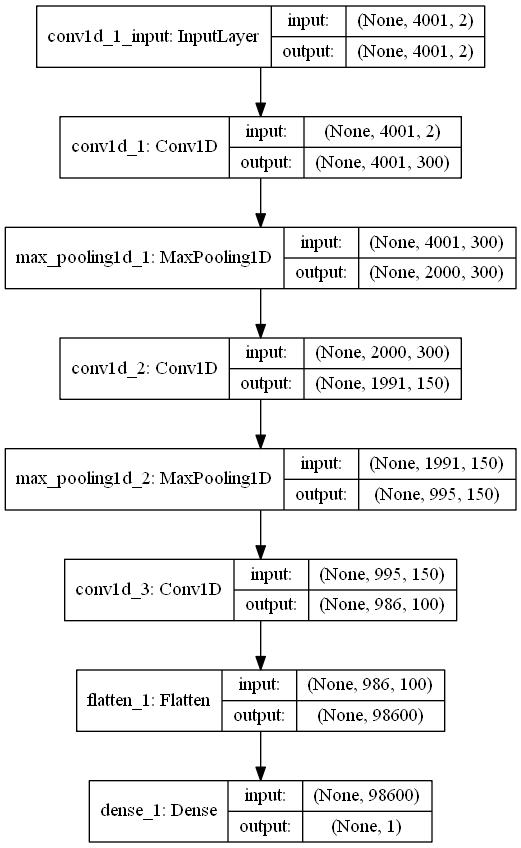

In [5]:
import os
# conda install python-graphviz

from keras.utils.vis_utils import plot_model
from keras.utils.vis_utils import model_to_dot

# plot_model(Write the name of the network i.e. model/classifier etc.,to_file='Name of the figure.jpeg',show_shapes=True,show_layer_names=True)
network=os.getcwd()+'\\1D_CNN.jpeg'
plot_model(model,to_file=network,show_shapes=True,show_layer_names=True)


In [6]:
# Network_name.summary()
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_1 (Conv1D)            (None, 4001, 300)         90300     
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 2000, 300)         0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 1991, 150)         450150    
_________________________________________________________________
max_pooling1d_2 (MaxPooling1 (None, 995, 150)          0         
_________________________________________________________________
conv1d_3 (Conv1D)            (None, 986, 100)          150100    
_________________________________________________________________
flatten_1 (Flatten)          (None, 98600)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                

## LSTM Training Using Accelerometer Recordings

In [11]:
import keras
from keras.models import Sequential
from keras.layers import CuDNNLSTM, Dense, Dropout, LSTM
from keras.optimizers import Adam

#Initializing the classifier Network
classifier = Sequential()

#Adding the input LSTM network layer
# classifier.add(CuDNNLSTM(128, input_shape=(X_train.shape[1:]), return_sequences=True))
classifier.add(CuDNNLSTM(128, input_shape=(4001,2), return_sequences=True))
# The return_sequences parameter, when set to true, will return a sequence of output to the next layer.
# We set it to true since the next layer is also a Recurrent Network Layer
classifier.add(Dropout(0.2))

C:\Users\VISHU\Anaconda3\lib\site-packages\dask\config.py:168: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  data = yaml.load(f.read()) or {}


In [12]:
classifier.add(CuDNNLSTM(128))

#Adding a dense hidden layer
classifier.add(Dense(64, activation='relu'))
classifier.add(Dropout(0.2))

#Adding the output layer
classifier.add(Dense(10, activation='softmax'))

# The CuDNNLSTM layer makes use of the CUDA framework to access the GPU resources. 
# If you do not have a GPU you can use the LSTM layer instead, with an activation function.
# classifier.add(LSTM(128, input_shape=(4001,2), return_sequences=True))

In [13]:
#Compiling the network
classifier.compile( loss='sparse_categorical_crossentropy',optimizer=Adam(lr=0.001, decay=1e-6),metrics=['accuracy'] )

In [14]:
#Fitting the data to the model

Network_2=[]

for key in cols_1:
    print('Training of LSTM for Joint: '+str(key+1)+' initiated')
    classifier.fit(X_Input[key],y_Input[key],epochs=10,validation_data=(X_Output[key], y_Output[key]))
    Network_2.append(classifier)
    print('Training of LSTM for Joint: '+str(key+1)+' completed')
    print("\n")

Training of LSTM for Joint: 1 initiated
Train on 60 samples, validate on 16 samples
Epoch 1/10
60/60 [==============================] - 2s 36ms/step - loss: 2.3018 - accuracy: 0.5333 - val_loss: 2.2994 - val_accuracy: 0.3125
Epoch 2/10
60/60 [==============================] - 1s 17ms/step - loss: 2.2986 - accuracy: 0.5333 - val_loss: 2.2962 - val_accuracy: 0.3125
Epoch 3/10
60/60 [==============================] - 1s 17ms/step - loss: 2.2954 - accuracy: 0.5333 - val_loss: 2.2930 - val_accuracy: 0.3125
Epoch 4/10
60/60 [==============================] - 1s 19ms/step - loss: 2.2923 - accuracy: 0.4333 - val_loss: 2.2898 - val_accuracy: 0.6875
Epoch 5/10
60/60 [==============================] - 1s 18ms/step - loss: 2.2891 - accuracy: 0.4667 - val_loss: 2.2866 - val_accuracy: 0.3125
Epoch 6/10
60/60 [==============================] - 1s 18ms/step - loss: 2.2859 - accuracy: 0.5333 - val_loss: 2.2835 - val_accuracy: 0.3125
Epoch 7/10
60/60 [==============================] - 1s 18ms/step - los

60/60 [==============================] - 1s 19ms/step - loss: 0.6949 - accuracy: 0.5167 - val_loss: 0.7276 - val_accuracy: 0.3125
Epoch 5/10
60/60 [==============================] - 1s 20ms/step - loss: 0.7130 - accuracy: 0.5500 - val_loss: 0.7257 - val_accuracy: 0.3125
Epoch 6/10
60/60 [==============================] - 1s 19ms/step - loss: 0.6789 - accuracy: 0.6000 - val_loss: 0.7218 - val_accuracy: 0.3125
Epoch 7/10
60/60 [==============================] - 1s 18ms/step - loss: 0.7014 - accuracy: 0.5500 - val_loss: 0.7116 - val_accuracy: 0.3125
Epoch 8/10
60/60 [==============================] - 1s 20ms/step - loss: 0.7183 - accuracy: 0.4667 - val_loss: 0.7128 - val_accuracy: 0.3125
Epoch 9/10
60/60 [==============================] - 1s 19ms/step - loss: 0.7473 - accuracy: 0.4167 - val_loss: 0.7078 - val_accuracy: 0.3125
Epoch 10/10
60/60 [==============================] - 1s 19ms/step - loss: 0.7263 - accuracy: 0.3833 - val_loss: 0.7127 - val_accuracy: 0.3125
Training of LSTM for Jo

60/60 [==============================] - 1s 18ms/step - loss: 0.6904 - accuracy: 0.5333 - val_loss: 0.7211 - val_accuracy: 0.3125
Training of LSTM for Joint: 16 completed


Training of LSTM for Joint: 17 initiated
Train on 60 samples, validate on 16 samples
Epoch 1/10
60/60 [==============================] - 1s 19ms/step - loss: 0.7031 - accuracy: 0.5333 - val_loss: 0.7202 - val_accuracy: 0.3125
Epoch 2/10
60/60 [==============================] - 1s 18ms/step - loss: 0.6875 - accuracy: 0.5833 - val_loss: 0.7180 - val_accuracy: 0.3125
Epoch 3/10
60/60 [==============================] - 1s 18ms/step - loss: 0.6850 - accuracy: 0.5333 - val_loss: 0.7202 - val_accuracy: 0.3125
Epoch 4/10
60/60 [==============================] - 1s 18ms/step - loss: 0.7075 - accuracy: 0.4667 - val_loss: 0.7219 - val_accuracy: 0.3125
Epoch 5/10
60/60 [==============================] - 1s 19ms/step - loss: 0.6969 - accuracy: 0.5333 - val_loss: 0.7271 - val_accuracy: 0.3125
Epoch 6/10
60/60 [===================

Epoch 3/10
60/60 [==============================] - 1s 18ms/step - loss: 0.7007 - accuracy: 0.5167 - val_loss: 0.7208 - val_accuracy: 0.3125
Epoch 4/10
60/60 [==============================] - 1s 18ms/step - loss: 0.6970 - accuracy: 0.5167 - val_loss: 0.7234 - val_accuracy: 0.3125
Epoch 5/10
60/60 [==============================] - 1s 18ms/step - loss: 0.6783 - accuracy: 0.6167 - val_loss: 0.7226 - val_accuracy: 0.3125
Epoch 6/10
60/60 [==============================] - 1s 19ms/step - loss: 0.6884 - accuracy: 0.5333 - val_loss: 0.7232 - val_accuracy: 0.3125
Epoch 7/10
60/60 [==============================] - 1s 18ms/step - loss: 0.6941 - accuracy: 0.5500 - val_loss: 0.7228 - val_accuracy: 0.3125
Epoch 8/10
60/60 [==============================] - 1s 18ms/step - loss: 0.6991 - accuracy: 0.5000 - val_loss: 0.7215 - val_accuracy: 0.3125
Epoch 9/10
60/60 [==============================] - 1s 18ms/step - loss: 0.6827 - accuracy: 0.5667 - val_loss: 0.7191 - val_accuracy: 0.3125
Epoch 10/10
6

60/60 [==============================] - 1s 18ms/step - loss: 0.6982 - accuracy: 0.5000 - val_loss: 0.7156 - val_accuracy: 0.3125
Epoch 10/10
60/60 [==============================] - 1s 21ms/step - loss: 0.6948 - accuracy: 0.5333 - val_loss: 0.7172 - val_accuracy: 0.3125
Training of LSTM for Joint: 32 completed


Training of LSTM for Joint: 33 initiated
Train on 60 samples, validate on 16 samples
Epoch 1/10
60/60 [==============================] - 1s 18ms/step - loss: 0.6841 - accuracy: 0.6000 - val_loss: 0.7178 - val_accuracy: 0.3125
Epoch 2/10
60/60 [==============================] - 1s 18ms/step - loss: 0.6965 - accuracy: 0.5333 - val_loss: 0.7161 - val_accuracy: 0.3125
Epoch 3/10
60/60 [==============================] - 1s 18ms/step - loss: 0.6950 - accuracy: 0.5000 - val_loss: 0.7180 - val_accuracy: 0.3125
Epoch 4/10
60/60 [==============================] - 1s 18ms/step - loss: 0.6924 - accuracy: 0.5333 - val_loss: 0.7231 - val_accuracy: 0.3125
Epoch 5/10
60/60 [==================

Epoch 2/10
60/60 [==============================] - 1s 20ms/step - loss: 0.6913 - accuracy: 0.5333 - val_loss: 0.7144 - val_accuracy: 0.3125
Epoch 3/10
60/60 [==============================] - 1s 20ms/step - loss: 0.6912 - accuracy: 0.5500 - val_loss: 0.7147 - val_accuracy: 0.3125
Epoch 4/10
60/60 [==============================] - 1s 19ms/step - loss: 0.6843 - accuracy: 0.5500 - val_loss: 0.7135 - val_accuracy: 0.3125
Epoch 5/10
60/60 [==============================] - 1s 20ms/step - loss: 0.6930 - accuracy: 0.5500 - val_loss: 0.7146 - val_accuracy: 0.3125
Epoch 6/10
60/60 [==============================] - 1s 20ms/step - loss: 0.6872 - accuracy: 0.5667 - val_loss: 0.7148 - val_accuracy: 0.3125
Epoch 7/10
60/60 [==============================] - 1s 20ms/step - loss: 0.6926 - accuracy: 0.5333 - val_loss: 0.7132 - val_accuracy: 0.3125
Epoch 8/10
60/60 [==============================] - 1s 19ms/step - loss: 0.6950 - accuracy: 0.5000 - val_loss: 0.7145 - val_accuracy: 0.3125
Epoch 9/10
60

60/60 [==============================] - 1s 18ms/step - loss: 0.6906 - accuracy: 0.5167 - val_loss: 0.7147 - val_accuracy: 0.3125
Epoch 9/10
60/60 [==============================] - 1s 18ms/step - loss: 0.6934 - accuracy: 0.5500 - val_loss: 0.7165 - val_accuracy: 0.3125
Epoch 10/10
60/60 [==============================] - 1s 19ms/step - loss: 0.6927 - accuracy: 0.5167 - val_loss: 0.7177 - val_accuracy: 0.3125
Training of LSTM for Joint: 48 completed


Training of LSTM for Joint: 49 initiated
Train on 60 samples, validate on 16 samples
Epoch 1/10
60/60 [==============================] - 1s 18ms/step - loss: 0.6941 - accuracy: 0.5167 - val_loss: 0.7200 - val_accuracy: 0.3125
Epoch 2/10
60/60 [==============================] - 1s 19ms/step - loss: 0.6948 - accuracy: 0.5333 - val_loss: 0.7229 - val_accuracy: 0.3125
Epoch 3/10
60/60 [==============================] - 1s 19ms/step - loss: 0.6866 - accuracy: 0.5333 - val_loss: 0.7257 - val_accuracy: 0.3125
Epoch 4/10
60/60 [==================

60/60 [==============================] - 1s 18ms/step - loss: 0.6947 - accuracy: 0.5167 - val_loss: 0.7263 - val_accuracy: 0.3125
Epoch 2/10
60/60 [==============================] - 1s 18ms/step - loss: 0.6964 - accuracy: 0.5333 - val_loss: 0.7263 - val_accuracy: 0.3125
Epoch 3/10
60/60 [==============================] - 1s 18ms/step - loss: 0.6885 - accuracy: 0.5000 - val_loss: 0.7233 - val_accuracy: 0.3125
Epoch 4/10
60/60 [==============================] - 1s 18ms/step - loss: 0.6893 - accuracy: 0.5333 - val_loss: 0.7214 - val_accuracy: 0.3125
Epoch 5/10
60/60 [==============================] - 1s 18ms/step - loss: 0.6904 - accuracy: 0.5500 - val_loss: 0.7185 - val_accuracy: 0.3125
Epoch 6/10
60/60 [==============================] - 1s 18ms/step - loss: 0.7016 - accuracy: 0.4833 - val_loss: 0.7172 - val_accuracy: 0.3125
Epoch 7/10
60/60 [==============================] - 1s 18ms/step - loss: 0.6965 - accuracy: 0.4833 - val_loss: 0.7183 - val_accuracy: 0.3125
Epoch 8/10
60/60 [======

60/60 [==============================] - 1s 19ms/step - loss: 0.6857 - accuracy: 0.5333 - val_loss: 0.7092 - val_accuracy: 0.3125
Epoch 8/10
60/60 [==============================] - 1s 18ms/step - loss: 0.6995 - accuracy: 0.5000 - val_loss: 0.7062 - val_accuracy: 0.3125
Epoch 9/10
60/60 [==============================] - 1s 18ms/step - loss: 0.6918 - accuracy: 0.5000 - val_loss: 0.7067 - val_accuracy: 0.3125
Epoch 10/10
60/60 [==============================] - 1s 21ms/step - loss: 0.6897 - accuracy: 0.4833 - val_loss: 0.7077 - val_accuracy: 0.3125
Training of LSTM for Joint: 64 completed


Training of LSTM for Joint: 65 initiated
Train on 60 samples, validate on 16 samples
Epoch 1/10
60/60 [==============================] - 1s 22ms/step - loss: 0.6928 - accuracy: 0.5500 - val_loss: 0.7079 - val_accuracy: 0.3125
Epoch 2/10
60/60 [==============================] - 1s 19ms/step - loss: 0.6913 - accuracy: 0.5333 - val_loss: 0.7114 - val_accuracy: 0.3125
Epoch 3/10
60/60 [==================

Epoch 3/10
60/60 [==============================] - 1s 18ms/step - loss: 0.6924 - accuracy: 0.5333 - val_loss: 0.7157 - val_accuracy: 0.3125
Epoch 4/10
60/60 [==============================] - 1s 20ms/step - loss: 0.6957 - accuracy: 0.5167 - val_loss: 0.7185 - val_accuracy: 0.3125
Epoch 5/10
60/60 [==============================] - 1s 19ms/step - loss: 0.6887 - accuracy: 0.5333 - val_loss: 0.7192 - val_accuracy: 0.3125
Epoch 6/10
60/60 [==============================] - 1s 18ms/step - loss: 0.6912 - accuracy: 0.5333 - val_loss: 0.7228 - val_accuracy: 0.3125
Epoch 7/10
60/60 [==============================] - 1s 19ms/step - loss: 0.6923 - accuracy: 0.5333 - val_loss: 0.7239 - val_accuracy: 0.3125
Epoch 8/10
60/60 [==============================] - 1s 18ms/step - loss: 0.6973 - accuracy: 0.5333 - val_loss: 0.7244 - val_accuracy: 0.3125
Epoch 9/10
60/60 [==============================] - 1s 19ms/step - loss: 0.6906 - accuracy: 0.5333 - val_loss: 0.7218 - val_accuracy: 0.3125
Epoch 10/10
6

60/60 [==============================] - 1s 14ms/step - loss: 0.6938 - accuracy: 0.5333 - val_loss: 0.7135 - val_accuracy: 0.3125
Epoch 10/10
60/60 [==============================] - 1s 14ms/step - loss: 0.6905 - accuracy: 0.5333 - val_loss: 0.7127 - val_accuracy: 0.3125
Training of LSTM for Joint: 85 completed


Training of LSTM for Joint: 86 initiated
Train on 60 samples, validate on 16 samples
Epoch 1/10
60/60 [==============================] - 1s 14ms/step - loss: 0.6951 - accuracy: 0.4833 - val_loss: 0.7133 - val_accuracy: 0.3125
Epoch 2/10
60/60 [==============================] - 1s 14ms/step - loss: 0.6931 - accuracy: 0.5167 - val_loss: 0.7125 - val_accuracy: 0.3125
Epoch 3/10
60/60 [==============================] - 1s 14ms/step - loss: 0.6911 - accuracy: 0.5167 - val_loss: 0.7147 - val_accuracy: 0.3125
Epoch 4/10
60/60 [==============================] - 1s 14ms/step - loss: 0.6920 - accuracy: 0.5333 - val_loss: 0.7174 - val_accuracy: 0.3125
Epoch 5/10
60/60 [==================

Epoch 2/10
60/60 [==============================] - 1s 14ms/step - loss: 0.6913 - accuracy: 0.5500 - val_loss: 0.7155 - val_accuracy: 0.3125
Epoch 3/10
60/60 [==============================] - 1s 14ms/step - loss: 0.6876 - accuracy: 0.5167 - val_loss: 0.7153 - val_accuracy: 0.3125
Epoch 4/10
60/60 [==============================] - 1s 14ms/step - loss: 0.6935 - accuracy: 0.5167 - val_loss: 0.7179 - val_accuracy: 0.3125
Epoch 5/10
60/60 [==============================] - 1s 14ms/step - loss: 0.6981 - accuracy: 0.5167 - val_loss: 0.7173 - val_accuracy: 0.3125
Epoch 6/10
60/60 [==============================] - 1s 13ms/step - loss: 0.6951 - accuracy: 0.5333 - val_loss: 0.7194 - val_accuracy: 0.3125
Epoch 7/10
60/60 [==============================] - 1s 14ms/step - loss: 0.6892 - accuracy: 0.5167 - val_loss: 0.7180 - val_accuracy: 0.3125
Epoch 8/10
60/60 [==============================] - 1s 14ms/step - loss: 0.6870 - accuracy: 0.5667 - val_loss: 0.7164 - val_accuracy: 0.3125
Epoch 9/10
60

60/60 [==============================] - 1s 14ms/step - loss: 0.6968 - accuracy: 0.5500 - val_loss: 0.7254 - val_accuracy: 0.3125
Epoch 9/10
60/60 [==============================] - 1s 14ms/step - loss: 0.6883 - accuracy: 0.5333 - val_loss: 0.7290 - val_accuracy: 0.3125
Epoch 10/10
60/60 [==============================] - 1s 14ms/step - loss: 0.6846 - accuracy: 0.5333 - val_loss: 0.7334 - val_accuracy: 0.3125
Training of LSTM for Joint: 101 completed


Training of LSTM for Joint: 102 initiated
Train on 60 samples, validate on 16 samples
Epoch 1/10
60/60 [==============================] - 1s 14ms/step - loss: 0.6941 - accuracy: 0.5167 - val_loss: 0.7339 - val_accuracy: 0.3125
Epoch 2/10
60/60 [==============================] - 1s 14ms/step - loss: 0.6938 - accuracy: 0.5333 - val_loss: 0.7337 - val_accuracy: 0.3125
Epoch 3/10
60/60 [==============================] - 1s 14ms/step - loss: 0.6982 - accuracy: 0.5333 - val_loss: 0.7295 - val_accuracy: 0.3125
Epoch 4/10
60/60 [================

60/60 [==============================] - 1s 14ms/step - loss: 0.6944 - accuracy: 0.5167 - val_loss: 0.7176 - val_accuracy: 0.3125
Epoch 2/10
60/60 [==============================] - 1s 14ms/step - loss: 0.6913 - accuracy: 0.5333 - val_loss: 0.7165 - val_accuracy: 0.3125
Epoch 3/10
60/60 [==============================] - 1s 14ms/step - loss: 0.6937 - accuracy: 0.5667 - val_loss: 0.7210 - val_accuracy: 0.3125
Epoch 4/10
60/60 [==============================] - 1s 14ms/step - loss: 0.6882 - accuracy: 0.5000 - val_loss: 0.7240 - val_accuracy: 0.3125
Epoch 5/10
60/60 [==============================] - 1s 14ms/step - loss: 0.6868 - accuracy: 0.5500 - val_loss: 0.7292 - val_accuracy: 0.3125
Epoch 6/10
60/60 [==============================] - 1s 14ms/step - loss: 0.6822 - accuracy: 0.5667 - val_loss: 0.7334 - val_accuracy: 0.3125
Epoch 7/10
60/60 [==============================] - 1s 14ms/step - loss: 0.6920 - accuracy: 0.5667 - val_loss: 0.7305 - val_accuracy: 0.3125
Epoch 8/10
60/60 [======

60/60 [==============================] - 1s 14ms/step - loss: 0.6588 - accuracy: 0.4167 - val_loss: 0.6554 - val_accuracy: 0.3125
Epoch 8/10
60/60 [==============================] - 1s 14ms/step - loss: 0.6557 - accuracy: 0.5667 - val_loss: 0.6608 - val_accuracy: 0.3125
Epoch 9/10
60/60 [==============================] - 1s 14ms/step - loss: 0.6618 - accuracy: 0.5000 - val_loss: 0.6641 - val_accuracy: 0.3125
Epoch 10/10
60/60 [==============================] - 1s 14ms/step - loss: 0.6606 - accuracy: 0.5167 - val_loss: 0.6688 - val_accuracy: 0.3125
Training of LSTM for Joint: 117 completed


Training of LSTM for Joint: 118 initiated
Train on 60 samples, validate on 16 samples
Epoch 1/10
60/60 [==============================] - 1s 14ms/step - loss: 0.6515 - accuracy: 0.4833 - val_loss: 0.6698 - val_accuracy: 0.3125
Epoch 2/10
60/60 [==============================] - 1s 14ms/step - loss: 0.6447 - accuracy: 0.5333 - val_loss: 0.6688 - val_accuracy: 0.3125
Epoch 3/10
60/60 [================

60/60 [==============================] - 1s 14ms/step - loss: 0.5154 - accuracy: 0.7333 - val_loss: 0.5979 - val_accuracy: 0.8125
Epoch 3/10
60/60 [==============================] - 1s 14ms/step - loss: 0.5119 - accuracy: 0.7333 - val_loss: 0.6080 - val_accuracy: 0.8125
Epoch 4/10
60/60 [==============================] - 1s 14ms/step - loss: 0.5315 - accuracy: 0.7333 - val_loss: 0.6082 - val_accuracy: 0.8125
Epoch 5/10
60/60 [==============================] - 1s 14ms/step - loss: 0.5046 - accuracy: 0.7333 - val_loss: 0.6152 - val_accuracy: 0.8125
Epoch 6/10
60/60 [==============================] - 1s 14ms/step - loss: 0.5335 - accuracy: 0.7333 - val_loss: 0.6186 - val_accuracy: 0.8125
Epoch 7/10
60/60 [==============================] - 1s 14ms/step - loss: 0.5194 - accuracy: 0.7333 - val_loss: 0.6154 - val_accuracy: 0.8125
Epoch 8/10
60/60 [==============================] - 1s 14ms/step - loss: 0.4992 - accuracy: 0.7333 - val_loss: 0.6147 - val_accuracy: 0.8125
Epoch 9/10
60/60 [======

60/60 [==============================] - 1s 14ms/step - loss: 0.6622 - accuracy: 0.5500 - val_loss: 0.7010 - val_accuracy: 0.3125
Epoch 9/10
60/60 [==============================] - 1s 14ms/step - loss: 0.6558 - accuracy: 0.6000 - val_loss: 0.6990 - val_accuracy: 0.3125
Epoch 10/10
60/60 [==============================] - 1s 13ms/step - loss: 0.6565 - accuracy: 0.5500 - val_loss: 0.6981 - val_accuracy: 0.3125
Training of LSTM for Joint: 138 completed


Training of LSTM for Joint: 139 initiated
Train on 60 samples, validate on 16 samples
Epoch 1/10
60/60 [==============================] - 1s 14ms/step - loss: 0.6393 - accuracy: 0.6000 - val_loss: 0.6572 - val_accuracy: 0.3125
Epoch 2/10
60/60 [==============================] - 1s 14ms/step - loss: 0.6369 - accuracy: 0.5667 - val_loss: 0.6553 - val_accuracy: 0.3125
Epoch 3/10
60/60 [==============================] - 1s 14ms/step - loss: 0.6373 - accuracy: 0.5333 - val_loss: 0.6533 - val_accuracy: 0.3125
Epoch 4/10
60/60 [================

60/60 [==============================] - 1s 14ms/step - loss: 0.6018 - accuracy: 0.6000 - val_loss: 0.6190 - val_accuracy: 0.7500
Epoch 2/10
60/60 [==============================] - 1s 14ms/step - loss: 0.5985 - accuracy: 0.6000 - val_loss: 0.6201 - val_accuracy: 0.7500
Epoch 3/10
60/60 [==============================] - 1s 14ms/step - loss: 0.5982 - accuracy: 0.6167 - val_loss: 0.6204 - val_accuracy: 0.7500
Epoch 4/10
60/60 [==============================] - 1s 14ms/step - loss: 0.6021 - accuracy: 0.6000 - val_loss: 0.6200 - val_accuracy: 0.7500
Epoch 5/10
60/60 [==============================] - 1s 14ms/step - loss: 0.5988 - accuracy: 0.6000 - val_loss: 0.6193 - val_accuracy: 0.7500
Epoch 6/10
60/60 [==============================] - 1s 13ms/step - loss: 0.5975 - accuracy: 0.6000 - val_loss: 0.6200 - val_accuracy: 0.7500
Epoch 7/10
60/60 [==============================] - 1s 14ms/step - loss: 0.6003 - accuracy: 0.6000 - val_loss: 0.6200 - val_accuracy: 0.7500
Epoch 8/10
60/60 [======

60/60 [==============================] - 1s 14ms/step - loss: 0.4427 - accuracy: 0.8500 - val_loss: 0.8358 - val_accuracy: 0.6250
Epoch 8/10
60/60 [==============================] - 1s 14ms/step - loss: 0.3971 - accuracy: 0.8667 - val_loss: 0.8429 - val_accuracy: 0.6250
Epoch 9/10
60/60 [==============================] - 1s 14ms/step - loss: 0.4052 - accuracy: 0.8667 - val_loss: 0.8454 - val_accuracy: 0.6250
Epoch 10/10
60/60 [==============================] - 1s 14ms/step - loss: 0.4088 - accuracy: 0.8667 - val_loss: 0.8494 - val_accuracy: 0.6250
Training of LSTM for Joint: 154 completed


Training of LSTM for Joint: 155 initiated
Train on 60 samples, validate on 16 samples
Epoch 1/10
60/60 [==============================] - 1s 14ms/step - loss: 1.0363 - accuracy: 0.4667 - val_loss: 0.6501 - val_accuracy: 0.6875
Epoch 2/10
60/60 [==============================] - 1s 14ms/step - loss: 0.8977 - accuracy: 0.4667 - val_loss: 0.6236 - val_accuracy: 0.6875
Epoch 3/10
60/60 [================

60/60 [==============================] - 1s 14ms/step - loss: 0.4290 - accuracy: 0.8333 - val_loss: 0.9987 - val_accuracy: 0.6250
Epoch 3/10
60/60 [==============================] - 1s 14ms/step - loss: 0.4374 - accuracy: 0.8333 - val_loss: 0.9800 - val_accuracy: 0.6250
Epoch 4/10
60/60 [==============================] - 1s 14ms/step - loss: 0.4296 - accuracy: 0.8333 - val_loss: 0.9599 - val_accuracy: 0.6250
Epoch 5/10
60/60 [==============================] - 1s 14ms/step - loss: 0.4416 - accuracy: 0.8333 - val_loss: 0.9339 - val_accuracy: 0.6250
Epoch 6/10
60/60 [==============================] - 1s 14ms/step - loss: 0.4397 - accuracy: 0.8333 - val_loss: 0.9214 - val_accuracy: 0.6250
Epoch 7/10
60/60 [==============================] - 1s 14ms/step - loss: 0.4478 - accuracy: 0.8333 - val_loss: 0.9083 - val_accuracy: 0.6250
Epoch 8/10
60/60 [==============================] - 1s 14ms/step - loss: 0.4260 - accuracy: 0.8333 - val_loss: 0.9078 - val_accuracy: 0.6250
Epoch 9/10
60/60 [======

60/60 [==============================] - 1s 14ms/step - loss: 0.4192 - accuracy: 0.8667 - val_loss: 0.8730 - val_accuracy: 0.6250
Epoch 9/10
60/60 [==============================] - 1s 14ms/step - loss: 0.3901 - accuracy: 0.8667 - val_loss: 0.8679 - val_accuracy: 0.6250
Epoch 10/10
60/60 [==============================] - 1s 14ms/step - loss: 0.3989 - accuracy: 0.8667 - val_loss: 0.8661 - val_accuracy: 0.6250
Training of LSTM for Joint: 175 completed


Training of LSTM for Joint: 176 initiated
Train on 60 samples, validate on 16 samples
Epoch 1/10
60/60 [==============================] - 1s 14ms/step - loss: 0.3802 - accuracy: 0.8667 - val_loss: 0.8609 - val_accuracy: 0.6250
Epoch 2/10
60/60 [==============================] - 1s 14ms/step - loss: 0.4021 - accuracy: 0.8667 - val_loss: 0.8598 - val_accuracy: 0.6250
Epoch 3/10
60/60 [==============================] - 1s 14ms/step - loss: 0.3842 - accuracy: 0.8667 - val_loss: 0.8605 - val_accuracy: 0.6250
Epoch 4/10
60/60 [================

60/60 [==============================] - 1s 14ms/step - loss: 0.6128 - accuracy: 0.6000 - val_loss: 0.6275 - val_accuracy: 0.3125
Epoch 2/10
60/60 [==============================] - 1s 14ms/step - loss: 0.6116 - accuracy: 0.5333 - val_loss: 0.6242 - val_accuracy: 0.3125
Epoch 3/10
60/60 [==============================] - 1s 14ms/step - loss: 0.6147 - accuracy: 0.4833 - val_loss: 0.6192 - val_accuracy: 0.3125
Epoch 4/10
60/60 [==============================] - 1s 14ms/step - loss: 0.6122 - accuracy: 0.5333 - val_loss: 0.6146 - val_accuracy: 0.3125
Epoch 5/10
60/60 [==============================] - 1s 14ms/step - loss: 0.6068 - accuracy: 0.6500 - val_loss: 0.6096 - val_accuracy: 0.8125
Epoch 6/10
60/60 [==============================] - 1s 14ms/step - loss: 0.6080 - accuracy: 0.6167 - val_loss: 0.6052 - val_accuracy: 0.8125
Epoch 7/10
60/60 [==============================] - 1s 14ms/step - loss: 0.6091 - accuracy: 0.5833 - val_loss: 0.6004 - val_accuracy: 0.8125
Epoch 8/10
60/60 [======

60/60 [==============================] - 1s 14ms/step - loss: 0.4220 - accuracy: 0.8500 - val_loss: 0.8910 - val_accuracy: 0.6250
Epoch 8/10
60/60 [==============================] - 1s 14ms/step - loss: 0.4102 - accuracy: 0.8500 - val_loss: 0.9015 - val_accuracy: 0.6250
Epoch 9/10
60/60 [==============================] - 1s 14ms/step - loss: 0.4010 - accuracy: 0.8500 - val_loss: 0.9102 - val_accuracy: 0.6250
Epoch 10/10
60/60 [==============================] - 1s 14ms/step - loss: 0.4157 - accuracy: 0.8500 - val_loss: 0.9170 - val_accuracy: 0.6250
Training of LSTM for Joint: 192 completed


Training of LSTM for Joint: 193 initiated
Train on 60 samples, validate on 16 samples
Epoch 1/10
60/60 [==============================] - 1s 14ms/step - loss: 0.4186 - accuracy: 0.8500 - val_loss: 0.6797 - val_accuracy: 0.7500
Epoch 2/10
60/60 [==============================] - 1s 14ms/step - loss: 0.4140 - accuracy: 0.8500 - val_loss: 0.6759 - val_accuracy: 0.7500
Epoch 3/10
60/60 [================

60/60 [==============================] - 1s 14ms/step - loss: 0.6690 - accuracy: 0.5333 - val_loss: 0.6767 - val_accuracy: 0.3125
Epoch 3/10
60/60 [==============================] - 1s 14ms/step - loss: 0.6652 - accuracy: 0.5333 - val_loss: 0.6750 - val_accuracy: 0.3125
Epoch 4/10
60/60 [==============================] - 1s 14ms/step - loss: 0.6651 - accuracy: 0.5167 - val_loss: 0.6734 - val_accuracy: 0.3125
Epoch 5/10
60/60 [==============================] - 1s 14ms/step - loss: 0.6642 - accuracy: 0.5333 - val_loss: 0.6718 - val_accuracy: 0.3125
Epoch 6/10
60/60 [==============================] - 1s 14ms/step - loss: 0.6634 - accuracy: 0.5333 - val_loss: 0.6705 - val_accuracy: 0.3125
Epoch 7/10
60/60 [==============================] - 1s 14ms/step - loss: 0.6618 - accuracy: 0.5333 - val_loss: 0.6693 - val_accuracy: 0.3125
Epoch 8/10
60/60 [==============================] - 1s 14ms/step - loss: 0.6636 - accuracy: 0.5333 - val_loss: 0.6683 - val_accuracy: 0.3125
Epoch 9/10
60/60 [======

60/60 [==============================] - 1s 14ms/step - loss: 0.4135 - accuracy: 0.8500 - val_loss: 0.7571 - val_accuracy: 0.6875
Epoch 9/10
60/60 [==============================] - 1s 14ms/step - loss: 0.4188 - accuracy: 0.8500 - val_loss: 0.7529 - val_accuracy: 0.6875
Epoch 10/10
60/60 [==============================] - 1s 14ms/step - loss: 0.4270 - accuracy: 0.8500 - val_loss: 0.7520 - val_accuracy: 0.6875
Training of LSTM for Joint: 213 completed


Training of LSTM for Joint: 214 initiated
Train on 60 samples, validate on 16 samples
Epoch 1/10
60/60 [==============================] - 1s 14ms/step - loss: 0.4425 - accuracy: 0.8500 - val_loss: 0.7503 - val_accuracy: 0.6875
Epoch 2/10
60/60 [==============================] - 1s 14ms/step - loss: 0.4180 - accuracy: 0.8500 - val_loss: 0.7472 - val_accuracy: 0.6875
Epoch 3/10
60/60 [==============================] - 1s 14ms/step - loss: 0.4194 - accuracy: 0.8500 - val_loss: 0.7443 - val_accuracy: 0.6875
Epoch 4/10
60/60 [================

60/60 [==============================] - 1s 14ms/step - loss: 0.3951 - accuracy: 0.8667 - val_loss: 0.8713 - val_accuracy: 0.6250
Epoch 2/10
60/60 [==============================] - 1s 14ms/step - loss: 0.4109 - accuracy: 0.8667 - val_loss: 0.8636 - val_accuracy: 0.6250
Epoch 3/10
60/60 [==============================] - 1s 14ms/step - loss: 0.3989 - accuracy: 0.8667 - val_loss: 0.8615 - val_accuracy: 0.6250
Epoch 4/10
60/60 [==============================] - 1s 14ms/step - loss: 0.4269 - accuracy: 0.8667 - val_loss: 0.8568 - val_accuracy: 0.6250
Epoch 5/10
60/60 [==============================] - 1s 14ms/step - loss: 0.3853 - accuracy: 0.8667 - val_loss: 0.8559 - val_accuracy: 0.6250
Epoch 6/10
60/60 [==============================] - 1s 14ms/step - loss: 0.4336 - accuracy: 0.8667 - val_loss: 0.8580 - val_accuracy: 0.6250
Epoch 7/10
60/60 [==============================] - 1s 14ms/step - loss: 0.3841 - accuracy: 0.8667 - val_loss: 0.8560 - val_accuracy: 0.6250
Epoch 8/10
60/60 [======

60/60 [==============================] - 1s 14ms/step - loss: 0.5497 - accuracy: 0.6667 - val_loss: 1.2813 - val_accuracy: 0.6875
Epoch 8/10
60/60 [==============================] - 1s 14ms/step - loss: 0.5477 - accuracy: 0.6667 - val_loss: 1.2925 - val_accuracy: 0.6875
Epoch 9/10
60/60 [==============================] - 1s 14ms/step - loss: 0.5460 - accuracy: 0.6667 - val_loss: 1.3033 - val_accuracy: 0.6875
Epoch 10/10
60/60 [==============================] - 1s 14ms/step - loss: 0.5457 - accuracy: 0.6667 - val_loss: 1.3144 - val_accuracy: 0.6875
Training of LSTM for Joint: 229 completed


Training of LSTM for Joint: 230 initiated
Train on 60 samples, validate on 16 samples
Epoch 1/10
60/60 [==============================] - 1s 14ms/step - loss: 0.5646 - accuracy: 0.7167 - val_loss: 1.3079 - val_accuracy: 0.6875
Epoch 2/10
60/60 [==============================] - 1s 14ms/step - loss: 0.5563 - accuracy: 0.7167 - val_loss: 1.2963 - val_accuracy: 0.6875
Epoch 3/10
60/60 [================

60/60 [==============================] - 1s 14ms/step - loss: 0.4523 - accuracy: 0.8333 - val_loss: 0.8128 - val_accuracy: 0.6250
Epoch 3/10
60/60 [==============================] - 1s 14ms/step - loss: 0.4383 - accuracy: 0.8333 - val_loss: 0.8195 - val_accuracy: 0.6250
Epoch 4/10
60/60 [==============================] - 1s 14ms/step - loss: 0.4585 - accuracy: 0.8333 - val_loss: 0.8263 - val_accuracy: 0.6250
Epoch 5/10
60/60 [==============================] - 1s 15ms/step - loss: 0.4566 - accuracy: 0.8333 - val_loss: 0.8372 - val_accuracy: 0.6250
Epoch 6/10
60/60 [==============================] - 1s 15ms/step - loss: 0.4361 - accuracy: 0.8333 - val_loss: 0.8449 - val_accuracy: 0.6250
Epoch 7/10
60/60 [==============================] - 1s 15ms/step - loss: 0.4363 - accuracy: 0.8333 - val_loss: 0.8530 - val_accuracy: 0.6250
Epoch 8/10
60/60 [==============================] - 1s 15ms/step - loss: 0.4394 - accuracy: 0.8333 - val_loss: 0.8616 - val_accuracy: 0.6250
Epoch 9/10
60/60 [======

60/60 [==============================] - 1s 14ms/step - loss: 0.5768 - accuracy: 0.6333 - val_loss: 1.1364 - val_accuracy: 0.6875
Epoch 9/10
60/60 [==============================] - 1s 14ms/step - loss: 0.5780 - accuracy: 0.6333 - val_loss: 1.1462 - val_accuracy: 0.6875
Epoch 10/10
60/60 [==============================] - 1s 14ms/step - loss: 0.5745 - accuracy: 0.6333 - val_loss: 1.1552 - val_accuracy: 0.6875
Training of LSTM for Joint: 250 completed


Training of LSTM for Joint: 251 initiated
Train on 60 samples, validate on 16 samples
Epoch 1/10
60/60 [==============================] - 1s 14ms/step - loss: 0.5508 - accuracy: 0.6667 - val_loss: 1.1648 - val_accuracy: 0.6875
Epoch 2/10
60/60 [==============================] - 1s 14ms/step - loss: 0.5477 - accuracy: 0.6667 - val_loss: 1.1749 - val_accuracy: 0.6875
Epoch 3/10
60/60 [==============================] - 1s 14ms/step - loss: 0.5497 - accuracy: 0.6667 - val_loss: 1.1835 - val_accuracy: 0.6875
Epoch 4/10
60/60 [================

60/60 [==============================] - 1s 14ms/step - loss: 0.3882 - accuracy: 0.8500 - val_loss: 0.9727 - val_accuracy: 0.6250
Epoch 2/10
60/60 [==============================] - 1s 14ms/step - loss: 0.3721 - accuracy: 0.8500 - val_loss: 0.9852 - val_accuracy: 0.6250
Epoch 3/10
60/60 [==============================] - 1s 14ms/step - loss: 0.3652 - accuracy: 0.8500 - val_loss: 0.9992 - val_accuracy: 0.6250
Epoch 4/10
60/60 [==============================] - 1s 14ms/step - loss: 0.3814 - accuracy: 0.8500 - val_loss: 1.0151 - val_accuracy: 0.6250
Epoch 5/10
60/60 [==============================] - 1s 14ms/step - loss: 0.3659 - accuracy: 0.8500 - val_loss: 1.0361 - val_accuracy: 0.6250
Epoch 6/10
60/60 [==============================] - 1s 14ms/step - loss: 0.3925 - accuracy: 0.8500 - val_loss: 1.0577 - val_accuracy: 0.6250
Epoch 7/10
60/60 [==============================] - 1s 14ms/step - loss: 0.3843 - accuracy: 0.8500 - val_loss: 1.0779 - val_accuracy: 0.6250
Epoch 8/10
60/60 [======

60/60 [==============================] - 1s 14ms/step - loss: 0.6972 - accuracy: 0.4333 - val_loss: 0.7034 - val_accuracy: 0.3125
Epoch 8/10
60/60 [==============================] - 1s 14ms/step - loss: 0.6970 - accuracy: 0.5000 - val_loss: 0.7070 - val_accuracy: 0.3125
Epoch 9/10
60/60 [==============================] - 1s 14ms/step - loss: 0.6903 - accuracy: 0.5167 - val_loss: 0.7112 - val_accuracy: 0.3125
Epoch 10/10
60/60 [==============================] - 1s 14ms/step - loss: 0.6994 - accuracy: 0.5000 - val_loss: 0.7150 - val_accuracy: 0.3125
Training of LSTM for Joint: 266 completed


Training of LSTM for Joint: 267 initiated
Train on 60 samples, validate on 16 samples
Epoch 1/10
60/60 [==============================] - 1s 14ms/step - loss: 0.6963 - accuracy: 0.5167 - val_loss: 0.7188 - val_accuracy: 0.3125
Epoch 2/10
60/60 [==============================] - 1s 14ms/step - loss: 0.6898 - accuracy: 0.5333 - val_loss: 0.7225 - val_accuracy: 0.3125
Epoch 3/10
60/60 [================

60/60 [==============================] - 1s 14ms/step - loss: 0.3677 - accuracy: 0.8833 - val_loss: 0.9418 - val_accuracy: 0.6250
Epoch 3/10
60/60 [==============================] - 1s 14ms/step - loss: 0.4148 - accuracy: 0.8500 - val_loss: 0.9513 - val_accuracy: 0.6250
Epoch 4/10
60/60 [==============================] - 1s 14ms/step - loss: 0.4118 - accuracy: 0.8500 - val_loss: 0.9591 - val_accuracy: 0.6250
Epoch 5/10
60/60 [==============================] - 1s 14ms/step - loss: 0.4168 - accuracy: 0.8500 - val_loss: 0.9640 - val_accuracy: 0.6250
Epoch 6/10
60/60 [==============================] - 1s 13ms/step - loss: 0.4067 - accuracy: 0.8500 - val_loss: 0.9663 - val_accuracy: 0.6250
Epoch 7/10
60/60 [==============================] - 1s 14ms/step - loss: 0.4013 - accuracy: 0.8500 - val_loss: 0.9698 - val_accuracy: 0.6250
Epoch 8/10
60/60 [==============================] - 1s 14ms/step - loss: 0.3999 - accuracy: 0.8500 - val_loss: 0.9696 - val_accuracy: 0.6250
Epoch 9/10
60/60 [======

60/60 [==============================] - 1s 14ms/step - loss: 0.6913 - accuracy: 0.6000 - val_loss: 0.6992 - val_accuracy: 0.3125
Epoch 9/10
60/60 [==============================] - 1s 14ms/step - loss: 0.6949 - accuracy: 0.5333 - val_loss: 0.7034 - val_accuracy: 0.3125
Epoch 10/10
60/60 [==============================] - 1s 14ms/step - loss: 0.6920 - accuracy: 0.5667 - val_loss: 0.7078 - val_accuracy: 0.3125
Training of LSTM for Joint: 288 completed


Training of LSTM for Joint: 289 initiated
Train on 60 samples, validate on 16 samples
Epoch 1/10
60/60 [==============================] - 1s 14ms/step - loss: 0.6919 - accuracy: 0.5167 - val_loss: 0.7122 - val_accuracy: 0.3125
Epoch 2/10
60/60 [==============================] - 1s 14ms/step - loss: 0.6930 - accuracy: 0.5333 - val_loss: 0.7164 - val_accuracy: 0.3125
Epoch 3/10
60/60 [==============================] - 1s 14ms/step - loss: 0.6900 - accuracy: 0.5500 - val_loss: 0.7201 - val_accuracy: 0.3125
Epoch 4/10
60/60 [================

60/60 [==============================] - 1s 14ms/step - loss: 0.5825 - accuracy: 0.6333 - val_loss: 1.0908 - val_accuracy: 0.6875
Epoch 2/10
60/60 [==============================] - 1s 14ms/step - loss: 0.5793 - accuracy: 0.6333 - val_loss: 1.0990 - val_accuracy: 0.6875
Epoch 3/10
60/60 [==============================] - 1s 14ms/step - loss: 0.5772 - accuracy: 0.6333 - val_loss: 1.1069 - val_accuracy: 0.6875
Epoch 4/10
60/60 [==============================] - 1s 14ms/step - loss: 0.5795 - accuracy: 0.6333 - val_loss: 1.1142 - val_accuracy: 0.6875
Epoch 5/10
60/60 [==============================] - 1s 14ms/step - loss: 0.5784 - accuracy: 0.6333 - val_loss: 1.1214 - val_accuracy: 0.6875
Epoch 6/10
60/60 [==============================] - 1s 14ms/step - loss: 0.5766 - accuracy: 0.6333 - val_loss: 1.1288 - val_accuracy: 0.6875
Epoch 7/10
60/60 [==============================] - 1s 14ms/step - loss: 0.5756 - accuracy: 0.6333 - val_loss: 1.1363 - val_accuracy: 0.6875
Epoch 8/10
60/60 [======

60/60 [==============================] - 1s 14ms/step - loss: 0.4785 - accuracy: 0.8167 - val_loss: 0.8297 - val_accuracy: 0.6875
Epoch 8/10
60/60 [==============================] - 1s 14ms/step - loss: 0.4679 - accuracy: 0.8167 - val_loss: 0.8262 - val_accuracy: 0.6875
Epoch 9/10
60/60 [==============================] - 1s 14ms/step - loss: 0.4611 - accuracy: 0.8167 - val_loss: 0.8211 - val_accuracy: 0.6875
Epoch 10/10
60/60 [==============================] - 1s 14ms/step - loss: 0.4669 - accuracy: 0.8167 - val_loss: 0.8178 - val_accuracy: 0.6875
Training of LSTM for Joint: 304 completed


Training of LSTM for Joint: 305 initiated
Train on 60 samples, validate on 16 samples
Epoch 1/10
60/60 [==============================] - 1s 14ms/step - loss: 0.4384 - accuracy: 0.8500 - val_loss: 0.8182 - val_accuracy: 0.6875
Epoch 2/10
60/60 [==============================] - 1s 14ms/step - loss: 0.4338 - accuracy: 0.8500 - val_loss: 0.8122 - val_accuracy: 0.6875
Epoch 3/10
60/60 [================

60/60 [==============================] - 1s 14ms/step - loss: 0.5986 - accuracy: 0.6333 - val_loss: 0.7428 - val_accuracy: 0.7500
Epoch 3/10
60/60 [==============================] - 1s 14ms/step - loss: 0.6006 - accuracy: 0.5333 - val_loss: 0.7435 - val_accuracy: 0.7500
Epoch 4/10
60/60 [==============================] - 1s 14ms/step - loss: 0.6006 - accuracy: 0.5833 - val_loss: 0.7438 - val_accuracy: 0.7500
Epoch 5/10
60/60 [==============================] - 1s 14ms/step - loss: 0.5971 - accuracy: 0.5833 - val_loss: 0.7440 - val_accuracy: 0.7500
Epoch 6/10
60/60 [==============================] - 1s 14ms/step - loss: 0.5989 - accuracy: 0.5833 - val_loss: 0.7446 - val_accuracy: 0.7500
Epoch 7/10
60/60 [==============================] - 1s 14ms/step - loss: 0.5931 - accuracy: 0.6333 - val_loss: 0.7460 - val_accuracy: 0.7500
Epoch 8/10
60/60 [==============================] - 1s 14ms/step - loss: 0.5946 - accuracy: 0.6167 - val_loss: 0.7477 - val_accuracy: 0.7500
Epoch 9/10
60/60 [======

60/60 [==============================] - 1s 14ms/step - loss: 0.4184 - accuracy: 0.8667 - val_loss: 0.9380 - val_accuracy: 0.6250
Epoch 9/10
60/60 [==============================] - 1s 14ms/step - loss: 0.4115 - accuracy: 0.8667 - val_loss: 0.9520 - val_accuracy: 0.6250
Epoch 10/10
60/60 [==============================] - 1s 14ms/step - loss: 0.3997 - accuracy: 0.8667 - val_loss: 0.9673 - val_accuracy: 0.6250
Training of LSTM for Joint: 325 completed


Training of LSTM for Joint: 326 initiated
Train on 60 samples, validate on 16 samples
Epoch 1/10
60/60 [==============================] - 1s 14ms/step - loss: 0.4219 - accuracy: 0.8500 - val_loss: 0.8843 - val_accuracy: 0.6875
Epoch 2/10
60/60 [==============================] - 1s 14ms/step - loss: 0.4377 - accuracy: 0.8500 - val_loss: 0.8913 - val_accuracy: 0.6875
Epoch 3/10
60/60 [==============================] - 1s 14ms/step - loss: 0.4016 - accuracy: 0.8500 - val_loss: 0.8982 - val_accuracy: 0.6875
Epoch 4/10
60/60 [================

60/60 [==============================] - 1s 14ms/step - loss: 0.9285 - accuracy: 0.4667 - val_loss: 0.6326 - val_accuracy: 0.6875
Epoch 2/10
60/60 [==============================] - 1s 14ms/step - loss: 0.8665 - accuracy: 0.4667 - val_loss: 0.6248 - val_accuracy: 0.6875
Epoch 3/10
60/60 [==============================] - 1s 14ms/step - loss: 0.8500 - accuracy: 0.4667 - val_loss: 0.6212 - val_accuracy: 0.6875
Epoch 4/10
60/60 [==============================] - 1s 14ms/step - loss: 0.7970 - accuracy: 0.4667 - val_loss: 0.6232 - val_accuracy: 0.6875
Epoch 5/10
60/60 [==============================] - 1s 14ms/step - loss: 0.7631 - accuracy: 0.4667 - val_loss: 0.6300 - val_accuracy: 0.6875
Epoch 6/10
60/60 [==============================] - 1s 14ms/step - loss: 0.7383 - accuracy: 0.4667 - val_loss: 0.6400 - val_accuracy: 0.6875
Epoch 7/10
60/60 [==============================] - 1s 14ms/step - loss: 0.7166 - accuracy: 0.4667 - val_loss: 0.6503 - val_accuracy: 0.6875
Epoch 8/10
60/60 [======

60/60 [==============================] - 1s 14ms/step - loss: 0.4789 - accuracy: 0.8167 - val_loss: 0.9732 - val_accuracy: 0.5625
Epoch 8/10
60/60 [==============================] - 1s 14ms/step - loss: 0.4801 - accuracy: 0.8167 - val_loss: 0.9805 - val_accuracy: 0.5625
Epoch 9/10
60/60 [==============================] - 1s 14ms/step - loss: 0.4691 - accuracy: 0.8167 - val_loss: 0.9853 - val_accuracy: 0.5625
Epoch 10/10
60/60 [==============================] - 1s 14ms/step - loss: 0.4704 - accuracy: 0.8167 - val_loss: 0.9842 - val_accuracy: 0.5625
Training of LSTM for Joint: 342 completed


Training of LSTM for Joint: 343 initiated
Train on 60 samples, validate on 16 samples
Epoch 1/10
60/60 [==============================] - 1s 14ms/step - loss: 0.4268 - accuracy: 0.8500 - val_loss: 0.8679 - val_accuracy: 0.6250
Epoch 2/10
60/60 [==============================] - 1s 14ms/step - loss: 0.4406 - accuracy: 0.8500 - val_loss: 0.8633 - val_accuracy: 0.6250
Epoch 3/10
60/60 [================

60/60 [==============================] - 1s 14ms/step - loss: 1.3247 - accuracy: 0.4667 - val_loss: 0.7277 - val_accuracy: 0.6875
Epoch 3/10
60/60 [==============================] - 1s 14ms/step - loss: 1.0660 - accuracy: 0.4667 - val_loss: 0.6679 - val_accuracy: 0.6875
Epoch 4/10
60/60 [==============================] - 1s 14ms/step - loss: 0.9366 - accuracy: 0.4667 - val_loss: 0.6320 - val_accuracy: 0.6875
Epoch 5/10
60/60 [==============================] - 1s 14ms/step - loss: 0.8728 - accuracy: 0.4667 - val_loss: 0.6211 - val_accuracy: 0.6875
Epoch 6/10
60/60 [==============================] - 1s 14ms/step - loss: 0.7791 - accuracy: 0.4667 - val_loss: 0.6290 - val_accuracy: 0.6875
Epoch 7/10
60/60 [==============================] - 1s 14ms/step - loss: 0.7388 - accuracy: 0.4667 - val_loss: 0.6395 - val_accuracy: 0.6875
Epoch 8/10
60/60 [==============================] - 1s 14ms/step - loss: 0.7191 - accuracy: 0.4667 - val_loss: 0.6505 - val_accuracy: 0.6875
Epoch 9/10
60/60 [======

60/60 [==============================] - 1s 14ms/step - loss: 0.5344 - accuracy: 0.7667 - val_loss: 0.8229 - val_accuracy: 0.6250
Epoch 9/10
60/60 [==============================] - 1s 14ms/step - loss: 0.5210 - accuracy: 0.7667 - val_loss: 0.8154 - val_accuracy: 0.6250
Epoch 10/10
60/60 [==============================] - 1s 14ms/step - loss: 0.5170 - accuracy: 0.7667 - val_loss: 0.8127 - val_accuracy: 0.6250
Training of LSTM for Joint: 363 completed


Training of LSTM for Joint: 364 initiated
Train on 60 samples, validate on 16 samples
Epoch 1/10
60/60 [==============================] - 1s 14ms/step - loss: 0.5707 - accuracy: 0.7500 - val_loss: 0.9100 - val_accuracy: 0.5625
Epoch 2/10
60/60 [==============================] - 1s 14ms/step - loss: 0.5507 - accuracy: 0.7500 - val_loss: 0.9066 - val_accuracy: 0.5625
Epoch 3/10
60/60 [==============================] - 1s 14ms/step - loss: 0.5458 - accuracy: 0.7500 - val_loss: 0.9008 - val_accuracy: 0.5625
Epoch 4/10
60/60 [================

60/60 [==============================] - 1s 14ms/step - loss: 0.4287 - accuracy: 0.8500 - val_loss: 0.9106 - val_accuracy: 0.6250
Epoch 2/10
60/60 [==============================] - 1s 14ms/step - loss: 0.4135 - accuracy: 0.8500 - val_loss: 0.9162 - val_accuracy: 0.6250
Epoch 3/10
60/60 [==============================] - 1s 14ms/step - loss: 0.4256 - accuracy: 0.8500 - val_loss: 0.9249 - val_accuracy: 0.6250
Epoch 4/10
60/60 [==============================] - 1s 14ms/step - loss: 0.4244 - accuracy: 0.8500 - val_loss: 0.9345 - val_accuracy: 0.6250
Epoch 5/10
60/60 [==============================] - 1s 14ms/step - loss: 0.4138 - accuracy: 0.8500 - val_loss: 0.9437 - val_accuracy: 0.6250
Epoch 6/10
60/60 [==============================] - 1s 14ms/step - loss: 0.4076 - accuracy: 0.8500 - val_loss: 0.9543 - val_accuracy: 0.6250
Epoch 7/10
60/60 [==============================] - 1s 14ms/step - loss: 0.3986 - accuracy: 0.8500 - val_loss: 0.9678 - val_accuracy: 0.6250
Epoch 8/10
60/60 [======

60/60 [==============================] - 1s 14ms/step - loss: 0.6437 - accuracy: 0.6167 - val_loss: 0.6240 - val_accuracy: 0.3125
Epoch 8/10
60/60 [==============================] - 1s 14ms/step - loss: 0.6472 - accuracy: 0.5333 - val_loss: 0.6213 - val_accuracy: 0.3125
Epoch 9/10
60/60 [==============================] - 1s 14ms/step - loss: 0.6404 - accuracy: 0.5833 - val_loss: 0.6200 - val_accuracy: 0.3125
Epoch 10/10
60/60 [==============================] - 1s 14ms/step - loss: 0.6497 - accuracy: 0.5333 - val_loss: 0.6177 - val_accuracy: 0.8125
Training of LSTM for Joint: 379 completed


Training of LSTM for Joint: 380 initiated
Train on 60 samples, validate on 16 samples
Epoch 1/10
60/60 [==============================] - 1s 14ms/step - loss: 0.6094 - accuracy: 0.6167 - val_loss: 0.6148 - val_accuracy: 0.8125
Epoch 2/10
60/60 [==============================] - 1s 14ms/step - loss: 0.6088 - accuracy: 0.6500 - val_loss: 0.6119 - val_accuracy: 0.8125
Epoch 3/10
60/60 [================

60/60 [==============================] - 1s 14ms/step - loss: 0.4709 - accuracy: 0.8333 - val_loss: 1.0693 - val_accuracy: 0.5625
Epoch 3/10
60/60 [==============================] - 1s 14ms/step - loss: 0.4781 - accuracy: 0.8333 - val_loss: 1.0464 - val_accuracy: 0.5625
Epoch 4/10
60/60 [==============================] - 1s 14ms/step - loss: 0.4366 - accuracy: 0.8333 - val_loss: 1.0231 - val_accuracy: 0.5625
Epoch 5/10
60/60 [==============================] - 1s 14ms/step - loss: 0.4541 - accuracy: 0.8333 - val_loss: 1.0035 - val_accuracy: 0.5625
Epoch 6/10
60/60 [==============================] - 1s 14ms/step - loss: 0.4506 - accuracy: 0.8333 - val_loss: 0.9883 - val_accuracy: 0.5625
Epoch 7/10
60/60 [==============================] - 1s 14ms/step - loss: 0.4295 - accuracy: 0.8333 - val_loss: 0.9765 - val_accuracy: 0.5625
Epoch 8/10
60/60 [==============================] - 1s 14ms/step - loss: 0.4278 - accuracy: 0.8333 - val_loss: 0.9676 - val_accuracy: 0.5625
Epoch 9/10
60/60 [======

60/60 [==============================] - 1s 14ms/step - loss: 0.7045 - accuracy: 0.5000 - val_loss: 0.7127 - val_accuracy: 0.3125
Epoch 9/10
60/60 [==============================] - 1s 14ms/step - loss: 0.7000 - accuracy: 0.5000 - val_loss: 0.7117 - val_accuracy: 0.3125
Epoch 10/10
60/60 [==============================] - 1s 14ms/step - loss: 0.7016 - accuracy: 0.4167 - val_loss: 0.7105 - val_accuracy: 0.3125
Training of LSTM for Joint: 400 completed


Training of LSTM for Joint: 401 initiated
Train on 60 samples, validate on 16 samples
Epoch 1/10
60/60 [==============================] - 1s 14ms/step - loss: 0.6633 - accuracy: 0.5667 - val_loss: 0.7034 - val_accuracy: 0.3125
Epoch 2/10
60/60 [==============================] - 1s 14ms/step - loss: 0.6492 - accuracy: 0.6000 - val_loss: 0.7017 - val_accuracy: 0.3125
Epoch 3/10
60/60 [==============================] - 1s 14ms/step - loss: 0.6536 - accuracy: 0.5333 - val_loss: 0.7005 - val_accuracy: 0.3125
Epoch 4/10
60/60 [================

60/60 [==============================] - 1s 14ms/step - loss: 0.4958 - accuracy: 0.8167 - val_loss: 0.9795 - val_accuracy: 0.6250
Epoch 2/10
60/60 [==============================] - 1s 14ms/step - loss: 0.4957 - accuracy: 0.8167 - val_loss: 0.9650 - val_accuracy: 0.6250
Epoch 3/10
60/60 [==============================] - 1s 14ms/step - loss: 0.5217 - accuracy: 0.8000 - val_loss: 0.9501 - val_accuracy: 0.6250
Epoch 4/10
60/60 [==============================] - 1s 14ms/step - loss: 0.5005 - accuracy: 0.8000 - val_loss: 0.9398 - val_accuracy: 0.6250
Epoch 5/10
60/60 [==============================] - 1s 14ms/step - loss: 0.5130 - accuracy: 0.7833 - val_loss: 0.9270 - val_accuracy: 0.6250
Epoch 6/10
60/60 [==============================] - 1s 14ms/step - loss: 0.5225 - accuracy: 0.7833 - val_loss: 0.9159 - val_accuracy: 0.6250
Epoch 7/10
60/60 [==============================] - 1s 14ms/step - loss: 0.5078 - accuracy: 0.7833 - val_loss: 0.9067 - val_accuracy: 0.6250
Epoch 8/10
60/60 [======

60/60 [==============================] - 1s 14ms/step - loss: 0.4440 - accuracy: 0.8333 - val_loss: 0.7064 - val_accuracy: 0.6875
Epoch 8/10
60/60 [==============================] - 1s 14ms/step - loss: 0.4717 - accuracy: 0.8333 - val_loss: 0.7077 - val_accuracy: 0.6875
Epoch 9/10
60/60 [==============================] - 1s 14ms/step - loss: 0.4610 - accuracy: 0.8333 - val_loss: 0.7109 - val_accuracy: 0.6875
Epoch 10/10
60/60 [==============================] - 1s 14ms/step - loss: 0.4458 - accuracy: 0.8333 - val_loss: 0.7147 - val_accuracy: 0.6875
Training of LSTM for Joint: 416 completed


Training of LSTM for Joint: 417 initiated
Train on 60 samples, validate on 16 samples
Epoch 1/10
60/60 [==============================] - 1s 14ms/step - loss: 0.3992 - accuracy: 0.8667 - val_loss: 0.7174 - val_accuracy: 0.6875
Epoch 2/10
60/60 [==============================] - 1s 14ms/step - loss: 0.3868 - accuracy: 0.8667 - val_loss: 0.7193 - val_accuracy: 0.6875
Epoch 3/10
60/60 [================

60/60 [==============================] - 1s 14ms/step - loss: 0.6212 - accuracy: 0.6667 - val_loss: 0.9912 - val_accuracy: 0.6875
Epoch 3/10
60/60 [==============================] - 1s 14ms/step - loss: 0.6076 - accuracy: 0.6667 - val_loss: 0.9779 - val_accuracy: 0.6875
Epoch 4/10
60/60 [==============================] - 1s 14ms/step - loss: 0.6094 - accuracy: 0.6667 - val_loss: 0.9609 - val_accuracy: 0.6875
Epoch 5/10
60/60 [==============================] - 1s 14ms/step - loss: 0.5920 - accuracy: 0.6667 - val_loss: 0.9447 - val_accuracy: 0.6875
Epoch 6/10
60/60 [==============================] - 1s 14ms/step - loss: 0.6047 - accuracy: 0.6667 - val_loss: 0.9298 - val_accuracy: 0.6875
Epoch 7/10
60/60 [==============================] - 1s 14ms/step - loss: 0.6051 - accuracy: 0.6667 - val_loss: 0.9158 - val_accuracy: 0.6875
Epoch 8/10
60/60 [==============================] - 1s 14ms/step - loss: 0.5990 - accuracy: 0.6667 - val_loss: 0.9037 - val_accuracy: 0.6875
Epoch 9/10
60/60 [======

60/60 [==============================] - 1s 14ms/step - loss: 0.5138 - accuracy: 0.8000 - val_loss: 0.6464 - val_accuracy: 0.6875
Epoch 9/10
60/60 [==============================] - 1s 14ms/step - loss: 0.5285 - accuracy: 0.8000 - val_loss: 0.6363 - val_accuracy: 0.6875
Epoch 10/10
60/60 [==============================] - 1s 14ms/step - loss: 0.4933 - accuracy: 0.8000 - val_loss: 0.6297 - val_accuracy: 0.6875
Training of LSTM for Joint: 437 completed


Training of LSTM for Joint: 438 initiated
Train on 60 samples, validate on 16 samples
Epoch 1/10
60/60 [==============================] - 1s 14ms/step - loss: 0.4889 - accuracy: 0.8167 - val_loss: 0.6232 - val_accuracy: 0.6875
Epoch 2/10
60/60 [==============================] - 1s 14ms/step - loss: 0.4869 - accuracy: 0.8167 - val_loss: 0.6212 - val_accuracy: 0.6875
Epoch 3/10
60/60 [==============================] - 1s 14ms/step - loss: 0.4696 - accuracy: 0.8167 - val_loss: 0.6219 - val_accuracy: 0.6875
Epoch 4/10
60/60 [================

In [15]:
Two_Layered_LSTM_model_json=classifier.to_json()
with open("Two_Layered_LSTM_model.json","w") as json_file:
    json_file.write(Two_Layered_LSTM_model_json)
classifier.save_weights("Two_Layered_LSTM_model.h5")
print("Saved Network to disk")

Saved Network to disk


### Run the below cell to Load the saved model

In [ ]:
# # Loading the Saved Network 
# json_file=open('Two_Layered_LSTM_model.json','r')
# loaded_model_json=json_file.read()
# json_file.close()
# loaded_model=model_from_json(loaded_model_json)
# # Loading Weights into Loaded Model
# loaded_model.load_weights("Two_Layered_LSTM_model.h5")
# print("Loaded the model from disk")

### Overall efficiency from training

In [17]:
scores_2=0
efficiency_2=0
for key,index in zip(cols_1,range(437)):
    scores_2=scores_2+Network_2[index].evaluate(X_Output[key],y_Output[key])[1]
efficiency_2=(scores_2/n.shape(Network_2)[0])*100
print("\nEfficiency Obtained from LSTM Network on Test Dataset is: "+ str(efficiency_2)+"%")

16/16 [==============================] - 0s 7ms/step


16/16 [==============================] - 0s 8ms/step


16/16 [==============================] - 0s 8ms/step

Efficiency Obtained from LSTM Network on Test Dataset is: 65.20308924485126%


## 2-D CNN Using Spectrograms

In [5]:
path_1="D:\\DATASET\\Spectrogram_Data\\X-Axis\\"
path_2="D:\\DATASET\\Spectrogram_Data\\Y-Axis\\"

### X-Axis Accelerometer Recordings

In [25]:
from keras.preprocessing.image import ImageDataGenerator
from multiprocessing import Process

train_datagen={}
test_datagen={}
train_set={}
test_set={}

In [7]:
# def X_pathfinder(datatype,key):
#     if datatype=='Train':
#         X_file=path_1+"Joint_"+str(key)+"\\Train\\"
#     else:
#         X_file=path_1+"Joint_"+str(key)+"\\Test\\"
#     return(X_file)
        
# def Y_pathfinder(datatype,key):
#     if datatype=='Train':
#         Y_file=path_2+"Joint_"+str(key)+"\\Train\\"
#     else:
#         Y_file=path_2+"Joint_"+str(key)+"\\Test\\"
#     return(Y_file)

# for key in cols_1:
#     if __name__=='__main__':
#         Process(target=X_pathfinder,args=('Train',key)).start()
#         Process(target=X_pathfinder,args=('Test',key)).start()
#         file_X_Tr=X_pathfinder('Train',key)
#         file_X_Te=X_pathfinder('Test',key)   
#         train_datagen[key]=ImageDataGenerator(rescale=1./255)
#         train_set[key]=train_datagen[key].flow_from_directory(file_X_Tr,target_size=(432,288),
#                                                               classes=['Damaged','Undamaged'],class_mode='binary')
#         test_datagen[key]=ImageDataGenerator(rescale=1./255)
#         test_set[key]=train_datagen[key].flow_from_directory(file_X_Te,target_size=(432,288),
#                                                              classes=['Damaged','Undamaged'],class_mode='binary')


### OR

In [30]:
for key in cols_1:
    list_X_Tr=glob.glob(path_1+"Joint_"+str(key)+"\\Train\\")
    for file_X_Tr in list_X_Tr:
        train_datagen[key]=ImageDataGenerator(rescale=1./255)
        train_set[key]=train_datagen[key].flow_from_directory(file_X_Tr,target_size=(432,288),batch_size=4,
                                                              classes=['Damaged','Undamaged'],class_mode='binary')
   
    list_X_Te=glob.glob(path_1+"Joint_"+str(key)+"\\Test\\")
    for  file_X_Te in list_X_Te:
        test_datagen[key]=ImageDataGenerator(rescale=1./255)
        test_set[key]=train_datagen[key].flow_from_directory(file_X_Te,target_size=(432,288),batch_size=4,
                                                             classes=['Damaged','Undamaged'],class_mode='binary')


Found 60 images belonging to 2 classes.
Found 0 images belonging to 2 classes.
Found 60 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 60 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 60 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 60 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 60 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 60 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 60 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 60 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 60 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 60 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 60 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 60 images belonging to 2 classes.
F

Found 16 images belonging to 2 classes.
Found 60 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 60 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 60 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 60 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 60 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 60 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 60 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 60 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 60 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 60 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 60 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 60 images belonging to 2 classes.
Found 16 images belonging to 2 classes.


Found 16 images belonging to 2 classes.
Found 60 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 60 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 60 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 60 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 60 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 60 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 60 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 60 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 60 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 60 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 60 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 60 images belonging to 2 classes.
Found 16 images belonging to 2 classes.


Found 16 images belonging to 2 classes.
Found 60 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 60 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 60 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 60 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 60 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 60 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 60 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 60 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 59 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 60 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 60 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 60 images belonging to 2 classes.
Found 16 images belonging to 2 classes.


Found 16 images belonging to 2 classes.
Found 60 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 60 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 60 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 60 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 60 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 60 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 60 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 60 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 60 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 60 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 60 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 60 images belonging to 2 classes.
Found 16 images belonging to 2 classes.


In [31]:
from keras.models import Sequential
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense

In [33]:
classifier_X = Sequential()
classifier_X.add(Convolution2D(64,3,3,input_shape=(432,288,3),activation='relu'))
classifier_X.add(MaxPooling2D(pool_size=(2,2)))
classifier_X.add(Convolution2D(32,3,3,activation='relu'))
classifier_X.add(MaxPooling2D(pool_size=(2,2)))
classifier_X.add(Flatten())

classifier_X.add(Dense(output_dim=128,activation='relu'))
classifier_X.add(Dense(output_dim=1,activation='sigmoid'))
classifier_X.compile(optimizer='adam', loss='binary_crossentropy',metrics=['accuracy'])

C:\Users\VISHU\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), input_shape=(432, 288,..., activation="relu")`
  
C:\Users\VISHU\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu")`
  after removing the cwd from sys.path.
C:\Users\VISHU\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=128)`
  
C:\Users\VISHU\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=1)`
  if __name__ == '__main__':


##### Refer to the notebook 'Spectrogram Training' for this section

In [7]:
Network_3_X=[]
for key in cols_1:
    print('Training of CNN for Joint: '+str(key+1)+' initiated')
    classifier_X.fit_generator(train_set[key],steps_per_epoch=8,epochs=10,
                             validation_data=test_set[key],validation_steps=4)
    Network_3_X.append(classifier_X)
    print('Training of CNN for Joint: '+str(key+1)+' completed')
    print("\n")

In [ ]:
Two_D_CNN_modelX_json=classifier_X.to_json()
with open("Two_D_CNN_modelX.json","w") as json_file:
    json_file.write(Two_D_CNN_modelX_json)
classifier_X.save_weights("Two_D_CNN_modelX.h5")
print("Saved Network to disk")

In [ ]:
EFFICIENCY FROM X-AXIS TRAINING

In [ ]:
scores_3_X=0
efficiency_3_X=0
for key in cols_1:
    scores_3_X=scores_3_X+Network_3_X[key].evaluate(test_set[key])[1]
efficiency_3_X=(scores_3_X/n.shape(Network_3_X)[0])*100
print("\nEfficiency Obtained from 2D CNN Network on X Axis of Test Dataset is: "+ str(efficiency_3_X)+"%")

In [45]:
del train_datagen,test_datagen,train_set,test_set

### Y-Axis Accelerometer Recordings

In [46]:
train_datagen={}
test_datagen={}
train_set={}
test_set={}

In [48]:
for key in cols_1:
    list_Y_Tr=glob.glob(path_2+"Joint_"+str(key)+"\\Train\\")
    for file_Y_Tr in list_Y_Tr:
        train_datagen[key]=ImageDataGenerator(rescale=1./255)
        train_set[key]=train_datagen[key].flow_from_directory(file_Y_Tr,target_size=(432,288),
                                                              classes=['Damaged','Undamaged'],class_mode='binary')
 
    list_Y_Te=glob.glob(path_2+"Joint_"+str(key)+"\\Test\\")
    for  file_Y_Te in list_Y_Te:
        test_datagen[key]=ImageDataGenerator(rescale=1./255)
        test_set[key]=train_datagen[key].flow_from_directory(file_Y_Te,target_size=(432,288),
                                                             classes=['Damaged','Undamaged'],class_mode='binary')
        

In [27]:
classifier_Y = Sequential()
classifier_Y.add(Convolution2D(64,3,3,input_shape=(432,288,3),activation='relu'))
classifier_Y.add(MaxPooling2D(pool_size=(2,2)))
classifier_Y.add(Convolution2D(32,3,3,activation='relu'))
classifier_Y.add(MaxPooling2D(pool_size=(2,2)))
classifier_Y.add(Flatten())

classifier_Y.add(Dense(output_dim=128,activation='relu'))
classifier_Y.add(Dense(output_dim=1,activation='sigmoid'))
classifier_Y.compile(optimizer='adam', loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
Network_3_Y=[]
for key in cols_1:
    print('Training of CNN for Joint: '+str(key+1)+' initiated')
    classifier_Y.fit_generator(train_set[key],steps_per_epoch=8,epochs=10,
                             validation_data=test_set[key],validation_steps=4)
    Network_3_Y.append(classifier_Y)
    print('Training of CNN for Joint: '+str(key+1)+' completed')
    print("\n")

In [ ]:
Two_D_CNN_modelY_json=classifier_Y.to_json()
with open("Two_D_CNN_modelY.json","w") as json_file:
    json_file.write(Two_D_CNN_modelY_json)
classifier_Y.save_weights("Two_D_CNN_modelY.h5")
print("Saved Network to disk")

In [ ]:
OVERALL EFFICIENCY FROM TRAINING

In [ ]:
scores_3_Y=0
efficiency_3_Y=0
for key in cols_1:
    scores_3_Y=scores_3_Y+Network_3_Y[key].evaluate(test_set[key])[1]
efficiency_3_Y=scores_3_Y/n.shape(Network_3_Y)[0]
efficiency_3_Y=(scores_3_Y/n.shape(Network_3_Y)[0])*100
print("\nEfficiency Obtained from 2D CNN Network on Y-Axis of Test Dataset is: "+ str(efficiency_3_Y)+"%")

scores_3=scores_3_X+scores_3_Y
efficiency_3=(scores_3)/((n.shape(cols_1))[0]*2)
print("\nEfficiency Obtained from 2D CNN Network on  Test Dataset is: "+ str(efficiency_3)+"%")

In [ ]:
# # Loading the Saved Network 
# json_file=open('One_D_CNN_model.json','r')
# loaded_model_json=json_file.read()
# json_file.close()
# loaded_model=model_from_json(loaded_model_json)
# # Loading Weights into Loaded Model
# loaded_model.load_weights("One_D_CNN_model.h5")
# print("Loaded the model from disk")

In [ ]:
# for key in range(6):
#     test_loss, test_acc = classifier.evaluate(X_Output[key], y_Output[key])
#     print('Test Loss of: {}'.format(test_loss))
#     print('Test Accuracy: {}'.format(test_acc))